# **Final Project**
***
# **Ecommerce Customer Churn Analysis and Prediction**

Created By: 

- Irfanul Zuhdi N
- Nadya Sindi Safitri

## **Business Problem Understanding**

**Contex:**

- Dalam dunia E-commerce, perusahaan harus berusaha keras tidak hanya untuk meyakinkan customer tetapi juga untuk mempertahankan customer yang sudah ada. Suatu perusahaan E-commerce harus mampu memprediksi perilaku customer apakah seorang customer akan berhenti/tidak menggunakan E-commerce(churn). Churn merupakan orang yang berhenti menggunakan layanan E-commerce dikarenakan beberapa alasan. Salah satu bukti customer bisa dikatakan churn adalah ketika dia sudah lama tidak melakukan transaksi ataupun sudah lama tidak menggunakan layanan E-commerce. Semakin banyak yang churn akan mengakibatkan kerugian cukup besar untuk perusahaan. Karena biasanya, bahwa sebagian besar keuntungan perusahaan diperoleh dari customer yang tetap dan lebih banyak biaya untuk menarik customer baru daripada mempertahankan yang lama. Oleh karena itu, perusahaan ingin menemukan customer churn agar membantu perusahaan mempertahankan customer mereka dan mempertahankan hubungan dengan customer lama merupakan hal yang sangat penting, salah satunya mengurangi tingkat kerugian akibat kehilangan customer dengan memberikan promo yang sesuai kepada customer. 

- Target :

        0 : Customer tidak Churn 

        1 : Customer Churn


**Problem Statement:**

- Salah satu dampak dari persaingan di dunia E-commerce adalah kondisi dimana customer berhenti menggunakan ecommerce dengan alasan tidak ada kepuasan terhadap layanan dana customer lebih tertarik dengan layanan yang diberikan pesaing. Pada perusahaan bisnis ecommerce lebih menguntungkan untuk mempertahankan hubungan dengan customer dalam hal retensi dibandingkan dengan mendapatkan customer baru. Oleh karena itu perusahaan ingin mengetahui customer yang ingin churn atau tidak untuk mengurangi tingkat kerugiaan yang sangat besar. Ketika memperoleh customer yang baru biasanya akan menghabiskan biaya lima sampai enam kali lebih mahal daripada mempertahankan yang sudah ada.

**Goals:**

- Berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kecenderungan tinggi untuk seorang customer akan churn atau meninggalkan perusahaan. sehingga akan memudahkan perusahaan untuk menyusun strategi dalam mengurangi kerugian berupa kehilangan custumer tersebut dengan memberikan mereka beberapa layanan yang positif.
- Mengetahui faktor apa saja yang mempengaruhi customer akan churn dari e-commerce
- Mengetahui insight yang didapatkan dari analisis data untuk menjawab permasalahan bisnis perusahaan

**Analytic Approach:**

- Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang churn atau tidak. Selanjutnya kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi customer yang akan churn atau tidak.

**Metric Evaluation:**

![Confusion Matrix](confusion.jpeg)

*Type 1 error : False Positive*
<br>Konsekuensi: membuang-buang biaya dan waktu untuk mengadakan promo yang diberikan

*Type 2 error : False Negative*
<br>Konsekuensi: Kehilangan customer

Berdasarkan konsekuensinya, maka kita akan membuat model yang dapat meminimalisir 2 hal:
1. Jumlah biaya mengadakan promo yang diberikan kepada pelanggan sehingga harga yang keluar lebih efisien.
2. Jumlah pelanggan yang dianggap akan bertahan tetapi justru Churn, sehingga perusahaan akan kehilangan pelanggan dan menjadi rugi.

Maka sebisa mungkin kita akan membuat model yang dapat meminimalisir dari 2 konsekuensi tersebut. Oleh karena itu, metric utama yang kita gunakan adalah F1 score dan PR score.
- Alasan utama menggunakan metrics f1_score dan PR curve karena dapat digunakan untuk data imbalance seperti kasus ini.
- Precision-Recall curve secara khusus dirancang ketika kelas positif (churn) lebih menarik daripada kelas negatif (not churn), dan PR curve tidak terpengaruh oleh ketidakseimbangan data.
- f1_score digunakan ketika kita fokus pada kelas positif (churn) dan mempertimbangan kedua bagian False Negative (FN) dan False Positive (FP).


## **Data Understanding**

**Unit Analysis**

Berdasarkan *problem statement* ini merupakan permasalahan mengenai E-commerce (Company online retail) Customer Churn. Data ini disebarkan secara public di Kaggle. Data ini berisikan setiap baris data mempresentasikan satu customer yang di mana terdapat 5630 baris data dengan 20 kolom termasuk kolom 'CustomerID'.

**Attribute Information**

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| CustomerID | Int | ID tiap Customer yang belanja|
| Churn | Int | Pelanggan melakukan Churn dan tidak Churn |
| Tenure | Float | durasi(bulan) dalam menggunakan layanan ecommers  |
| PreferredLoginDevice | Object | Perangkat login pilihan pelanggan|
| CityTier | Int | Tingkatan Pengelompokan Daerah dalam satu negara |
| WarehouseToHome | Float | Jarak antara gudang ke rumah pelanggan |
| PreferredPaymentMode | Object | Metode pembayaran pilihan pelanggan|
| Gender | Object | Jenis kelamin pelanggan|
| HourSpendOnApp | Float | Jumlah durasi(jam) yang dihabiskan pelanggan dalam  menggunakan e-commerce|
| NumberOfDeviceRegistered | Int | Jumlah perangkat yang terdaftar oleh pelanggan |
| PreferedOrderCat | Object | Kategori pesanan pilihan pelanggan bulan lalu|
| SatisfactionScore | Int | Tingkat kepuasan pelanggan pada layanan|
| MaritalStatus | Object | Status pernikahan pelanggan|
| NumberOfAddress | Int | Jumlah alamat per pelanggan yang terdaftar pada e-commerce |
| Complain | Int | Keluhan yang telah diajukan oleh pelanggan pada bulan lalu |
| OrderAmountHikeFromlastYear | Float | Persentase volume jumlah kenaikan pesanan dari tahun lalu |
| CouponUsed | Float | kupon yang telah pengguna gunakan bulan lalu|
| OrderCount | Float | Jumlah pesanan per pelanggan di bulan lalu|
| DaySinceLastOrder | Float | Hari Sejak pesanan terakhir dipesan oleh pelanggan|
| CashbackAmount | Float | Rata-rata cashback bulan lalu|


In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, auc
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve
from catboost import CatBoostClassifier

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
# Load Dataset
df = pd.read_excel('E_Commerce_Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# Checking Information of dataset (count and datatype for each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
# Number of rows and columns
df.shape

(5630, 20)

Dataset ini terdapat 5630 baris dengan 20 kolom (termasuk kolom 'CustomerID')

**Numerical Feature**

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


**Categorical Feature**

In [6]:
df.describe(include='object').transpose()

,count,unique,top,freq
PreferredLoginDevice,5630,3,Mobile Phone,2765
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


**Pengecekan Dataset**

In [7]:
df['CustomerID'].head()

0    50001
1    50002
2    50003
3    50004
4    50005
Name: CustomerID, dtype: int64

In [8]:
(df["CustomerID"].astype(str).str.contains('\d+\S+')).value_counts()

True    5630
Name: CustomerID, dtype: int64

Jika dilihat dataset ini memiliki perbedaan setiap barisnya dapat dilihat dari kolom `CustomerID` yang mewakili satu customer ecommerce. Sehingga dapat dikatakan data tidak ada yang duplikat untuk saat ini.

## **Data Preprocessing (Cleaning)**

Sebelum kita melakukan Exploratory Data Analysis (EDA), sebaiknya kita melakukan Data Preprocessing atau Data Cleaning. Pada tahapan ini, kita akan melakukan pengecekan terhadap dataset apakah memiliki anomali. Jika terdapat anomali pada dataset, maka akan mempengaruhi hasil analisis yang kita lakukan. Data yang dapat mengganggu proses analisis dapat dilihat jika memiliki missing value, kesalahan dalam penulisan atau pengulangan penulisan untuk satu kata yang sama, data yang duplikat, tipe data yang tidak sesuai, dan data outlier. Oleh karena itu, perlu adanya penanganan terhadap beberapa data yang bermasalah tersebut. Sehingga, Data yang sudah bersih yang akan kita gunakan untuk lanjut ke tahap analisis. 

In [9]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype, len(df), df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))* 100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type',' Data Count', 'Missing Value', 'Missing Value Percentage', 'Member of Unique', 'Unique Sample'],
                    data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Member of Unique,Unique Sample
0,CustomerID,int64,5630,0,0.00,5630,"[51348, 55492]"
1,Churn,int64,5630,0,0.00,2,"[0, 1]"
2,Tenure,float64,5630,264,4.69,36,"[6.0, 3.0]"
3,PreferredLoginDevice,object,5630,0,0.00,3,"[Mobile Phone, Computer]"
4,CityTier,int64,5630,0,0.00,3,"[1, 3]"
5,WarehouseToHome,float64,5630,251,4.46,34,"[13.0, 24.0]"
6,PreferredPaymentMode,object,5630,0,0.00,7,"[Cash on Delivery, E wallet]"
7,Gender,object,5630,0,0.00,2,"[Female, Male]"
8,HourSpendOnApp,float64,5630,255,4.53,6,"[4.0, nan]"
9,NumberOfDeviceRegistered,int64,5630,0,0.00,6,"[6, 1]"


Langkah Pertama, kita melakukan drop pada kolom `CustomerID`. Karena kolom tersebut merupakan ID unik setiap customer yang tidak akan mempengaruhi target (tidak dapat digunakan untuk analisa data dan pembuatan model machine learning).

In [10]:
# Drop kolom 'CustomerID'
df = df.drop(['CustomerID'], axis=1)

**Check Target (Churn)**

,Churn
Churn,
0,4682
1,948


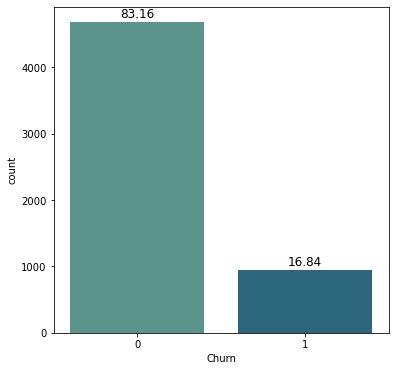

In [11]:
display(df.groupby('Churn').agg({'Churn':'count'}))
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Churn', data=df, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.show()

Dari dataset, data target atau 'Churn' merupakan data imbalance. Hal ini dilihat dari jumlah customer yang tidak churn sebesar 83% (4682 customer), sedangkan customer yang churn sebesar 17% (948 customer). 

### **Missing Value Treatment**

**Identifikasi kolom yang memiliki missing value (Barplot)**

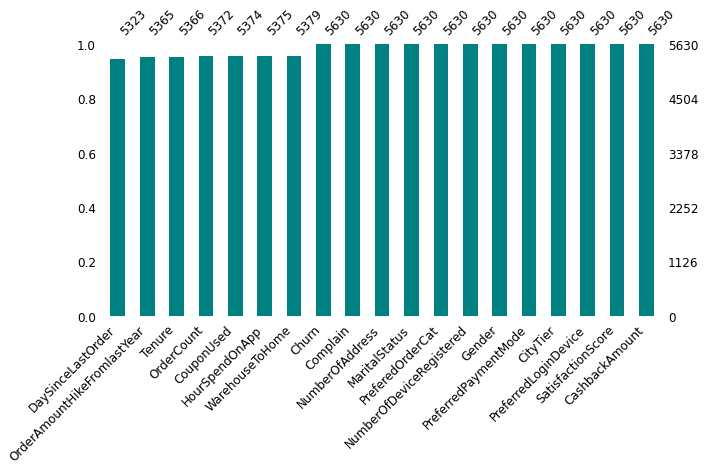

In [12]:
# Check missing values using barplot
missingno.bar(df, color = 'teal', sort="ascending", figsize=(10,5), fontsize=12);

Pada bagian sebelah kiri plot terdapat y-axis dengan rentang skala 0.0 - 1.0, yang di mana 1.0 mempresentasikan 100% data komplit atau tidak terdapat missing values. Jika bar pada masing-masing kolom yang kurang dari 1.0 maka diindikasi terdapat missing value. Sedangkan, pada bagian kanan plot merupakan skala diukur dengan index values, dengan angka tertinggi mewakili jumlah maksimum baris pada dataframe. Disepanjang bagian atas plot, merupakan angka yang mewakili jumlah total baris yang memiliki nilai untuk tiap kolom. 

Jika dilihat dari grafik, terdapat 7 kolom yang memiliki missing values, diantaranya kolom `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, dan `DaySinceLastOrder`. Terlihat bahwa jumlah baris yang dimiliki kolom tersebut tidak 5630 baris seperti kolom lainnya atau barplot kurang dari 1.0. 

**Penyebaran Missing values pada semua kolom (Matrix Plot)**

<AxesSubplot:>

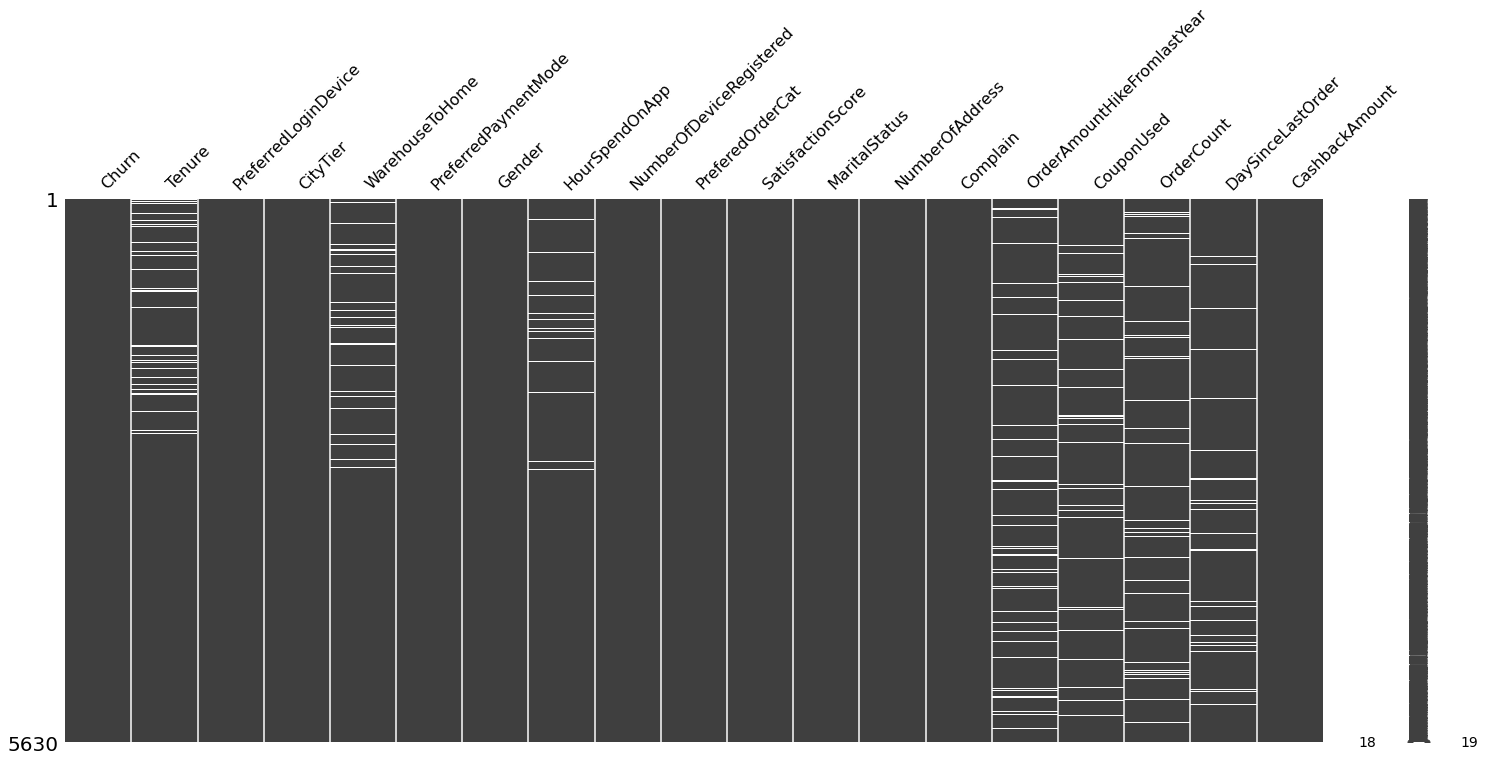

In [13]:
# Check missing values using matrix
missingno.matrix(df)

Matrix plot memberikan isian warna unutuk setiap kolom, jika data ada atau memiliki nilai maka, plot diarsir dalam warna abu-abu. Sedangkan, jika tidak ada atau missing values, plot ditampilkan dalam warna putih. Ketika menggunakan matrix plot kita dapat melihat penyebaran missing value dalam dataframe.

Melihat matriks diatas, terdapat nilai yang hilang tidak mengikuti pola apa pun, mereka hilang sepenuhnya secara acak atau Missing Completely at Random (MCAR). Kita akan mengurutkan data untuk mengungkap beberapa hubungan antara jenis yang hilang. Jika diurutkan berdasarkan kolom `CashbackAmount`, missing value merupakan tipe missing at random (MAR) yang dimana terdapat pola disana.

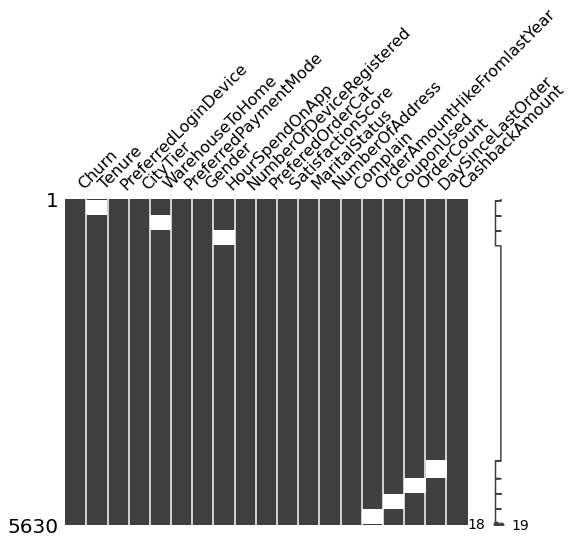

In [14]:
#plot the missingness matrix of sorted data
missingno.matrix(df.sort_values(by='CashbackAmount'), figsize=(8,6))
plt.show()

Ketika menggunakan grafik heatmap, terlihat bahwa missing values ini bertipe MAR (Missing  at Random) atau jenis missing value dimana distribusi data yang hilang tergantung pada data pengamatan, tetapi tidak tergantung data yang terdapat missing value ataupun tidak juga dengan kolom sendiri.nDalam hal ini, data tidak hilang untuk semua pengamatan. Data hilang hanya dalam sub-sampel data dan ada beberapa pola dalam nilai yang hilang. atau dengan kata lain, missing value disebabkan hanya karena data yang diamati.

**Identifikasi hubungan antara kolom missing value (Heatmap)**

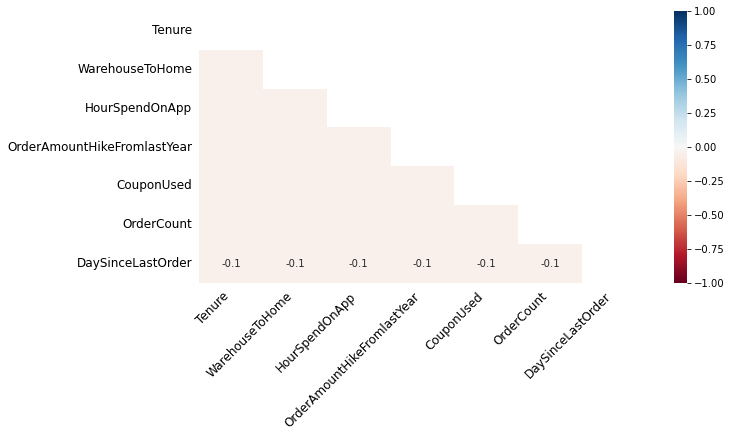

In [15]:
# Check korelasi antara kolom yang memiliki missing values
missingno.heatmap(df, figsize=(10,5), fontsize=12);

Heatmap digunakan untuk mengidentifikasi korelasi antar kolom missing value. Dengan kata lain, apakah terdapat hubungan dengan adanya null value antara masing-masing kolom. Pada grafik akan terdapat nilai, 
- jika nilai mendekati positif 1 menunjukkan bahwa keberadaan null value pada satu kolom berkorelasi dengan keberadaan nilai null value di kolom lainnya. 
- Sebaliknya, jika nilai mendekati negatif 1 menunjukkan bahwa keberadaan null value di satu kolom tidak memiliki korelasi atau antikorelasi dengan keberadaan null value di kolom lain. 
- Nilai yang mendekati 0 menunjukkan ada sedikit atau tidak ada hubungan antara keberadaan null value dalam satu kolom dibandingkan dengan kolom lainnya.

jika dilihat pada grafik ditunjukkan bahwa kolom DaySinceLastOrder memiliki sedikit korelasi negatif dengan seluruh kolom missing value lainnya. Selain itu tidak ada hubungan yang kuat (bewarna kuning = 0) antar kolom missing value.

In [16]:
# Melihat Jumlah dan persentase missing value
for i in df.columns:
    if df[i].isnull().sum() > 0:
      prct = np.mean(df[i].isnull())
      print(i)
      print(f'Jumlah missing value:', df[i].isnull().sum())
      print('Persentase Missing Value: {}%'.format(round(prct*100)))
      print('Datatype: ', df[i].dtypes)
      print()

Tenure
Jumlah missing value: 264
Persentase Missing Value: 5%
Datatype:  float64

WarehouseToHome
Jumlah missing value: 251
Persentase Missing Value: 4%
Datatype:  float64

HourSpendOnApp
Jumlah missing value: 255
Persentase Missing Value: 5%
Datatype:  float64

OrderAmountHikeFromlastYear
Jumlah missing value: 265
Persentase Missing Value: 5%
Datatype:  float64

CouponUsed
Jumlah missing value: 256
Persentase Missing Value: 5%
Datatype:  float64

OrderCount
Jumlah missing value: 258
Persentase Missing Value: 5%
Datatype:  float64

DaySinceLastOrder
Jumlah missing value: 307
Persentase Missing Value: 5%
Datatype:  float64



In [17]:
# Jumlah missing value dalam dataset
print(f'Total missing values: {df.isnull().sum().sum()}')

# Jumlah baris yang terdapat missing value
print(f'Total baris terdapat missing values: {df[df.isnull().any(axis=1)].shape[0]}')

# Persentase missing value
print(f'Persentase missing value: {round(df.isnull().sum().sum()/df.shape[0]*100, 2)}%')

Total missing values: 1856
Total baris terdapat missing values: 1856
Persentase missing value: 32.97%


Terdapat 7 kolom yang memiliki missing value, kolom tersebut antara lain:
1. Tenure --> 5% missing value
2. WarehouseToHome --> 4% missing value
3. HourSpendOnApp --> 5% missing value
4. OrderAmountHikeFromlastYear --> 5% missing value
5. CouponUsed --> 5% missing value
6. OrderCount --> 5% missing value
7. DaySinceLastOrder --> 5% missing value

Jika dilihat dari dataset, ketika seluruh baris yang memiliki missing value tersebut dihitung jumlah barisnya terdapat 1856 (32,97% ~ 33%) baris yang memiliki missing value. Untuk mengatasi missing value terdapat berbagai metode. Jika kita mengatasi missing value dengan metode melakukan drop missing value, maka kita akan kehilangan 33% data dari keseluruhan. Oleh karena itu, metode tersebut tidak menjadi pilihan.

Kita dapat memilih metode lain yaitu melakukan impute terhadap missing value. Kita akan mengisi missing value dengan 3 metode impute. pertama, kita dapat melakukan simpleimputer yaitu mengisi missing value berdasarkan mean, median untuk kolom numerikal, dan mode (most frequent) untuk kolom kategorikal. Selain itu, kita juga dapat melakukan iterativeimputer dan KNNimputer.

In [18]:
# Kolom-kolom missing value
missval_feature = df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']]
missval_feature.head()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,4.0,6.0,3.0,11.0,1.0,1.0,5.0
1,NaN,8.0,3.0,15.0,0.0,1.0,0.0
2,NaN,30.0,2.0,14.0,0.0,1.0,3.0
3,0.0,15.0,2.0,23.0,0.0,1.0,3.0
4,0.0,12.0,NaN,11.0,1.0,1.0,3.0


In [19]:
missval_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5366 non-null   float64
 1   WarehouseToHome              5379 non-null   float64
 2   HourSpendOnApp               5375 non-null   float64
 3   OrderAmountHikeFromlastYear  5365 non-null   float64
 4   CouponUsed                   5374 non-null   float64
 5   OrderCount                   5372 non-null   float64
 6   DaySinceLastOrder            5323 non-null   float64
dtypes: float64(7)
memory usage: 308.0 KB


Jika dilihat dari tipe data fitur yang memiliki missing value, semua fitur tersebut merupakan numerikal fitur.
Sebelum memutuskan untuk menggunakan metode untuk pengisian missing value, sebaiknya kita mengecek terlebih dahulu penyebaran datanya. Jika data berdistribusi normal, maka pengisian menggunakan mean. dan jika data tidak berdistribusi normal atau skewed, maka pengisian menggunakan median.

In [20]:
missval_feature.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.0,15.0,18.0,26.0
CouponUsed,5374.0,1.751023,1.894621,0.0,1.0,1.0,2.0,16.0
OrderCount,5372.0,3.008004,2.939680,1.0,1.0,2.0,3.0,16.0
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.0,3.0,7.0,46.0


In [21]:
df_num = pd.concat([df.groupby('Churn').min(),df.groupby('Churn').mean(),df.groupby('Churn').max()], keys=['Min','Mean','Max']).select_dtypes(exclude='object')
df_num

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
     Churn                                                         
Min  0       0.000000  1.000000         5.000000        0.000000   
     1       0.000000  1.000000         5.000000        2.000000   
Mean 0      11.502334  1.619821        15.353931        2.925530   
     1       3.379469  1.827004        17.134259        2.961798   
Max  0      61.000000  3.000000       127.000000        5.000000   
     1      21.000000  3.000000        36.000000        4.000000   

            NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
     Churn                                                                 
Min  0                      1.000000           1.000000         1.000000   
     1                      1.000000           1.000000         1.000000   
Mean 0                      3.639257           3.001282         4.162965   
     1                      3.934599           3.390295         4.466245   
Max  0                      6.000000           5.000000        22.000000   
     1                      6.000000           5.000000        20.000000   

            Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
     Churn                                                                  
Min  0      0.000000                    11.000000    0.000000    1.000000   
     1      0.000000                    11.000000    0.000000    1.000000   
Mean 0      0.234088                    15.724893    1.758232    3.046601   
     1      0.535865                    15.627409    1.717021    2.823656   
Max  0      1.000000                    26.000000   16.000000   16.000000   
     1      1.000000                    26.000000   16.000000   16.000000   

            DaySinceLastOrder  CashbackAmount  
     Churn                                     
Min  0               0.000000        0.000000  
     1               0.000000      110.090000  
Mean 0               4.807406      180.635203  
     1               3.236018      160.370928  
Max  0              31.000000      324.990000  
     1              46.000000      323.590000

**Cek Penyebaran data menggunakan histogram**

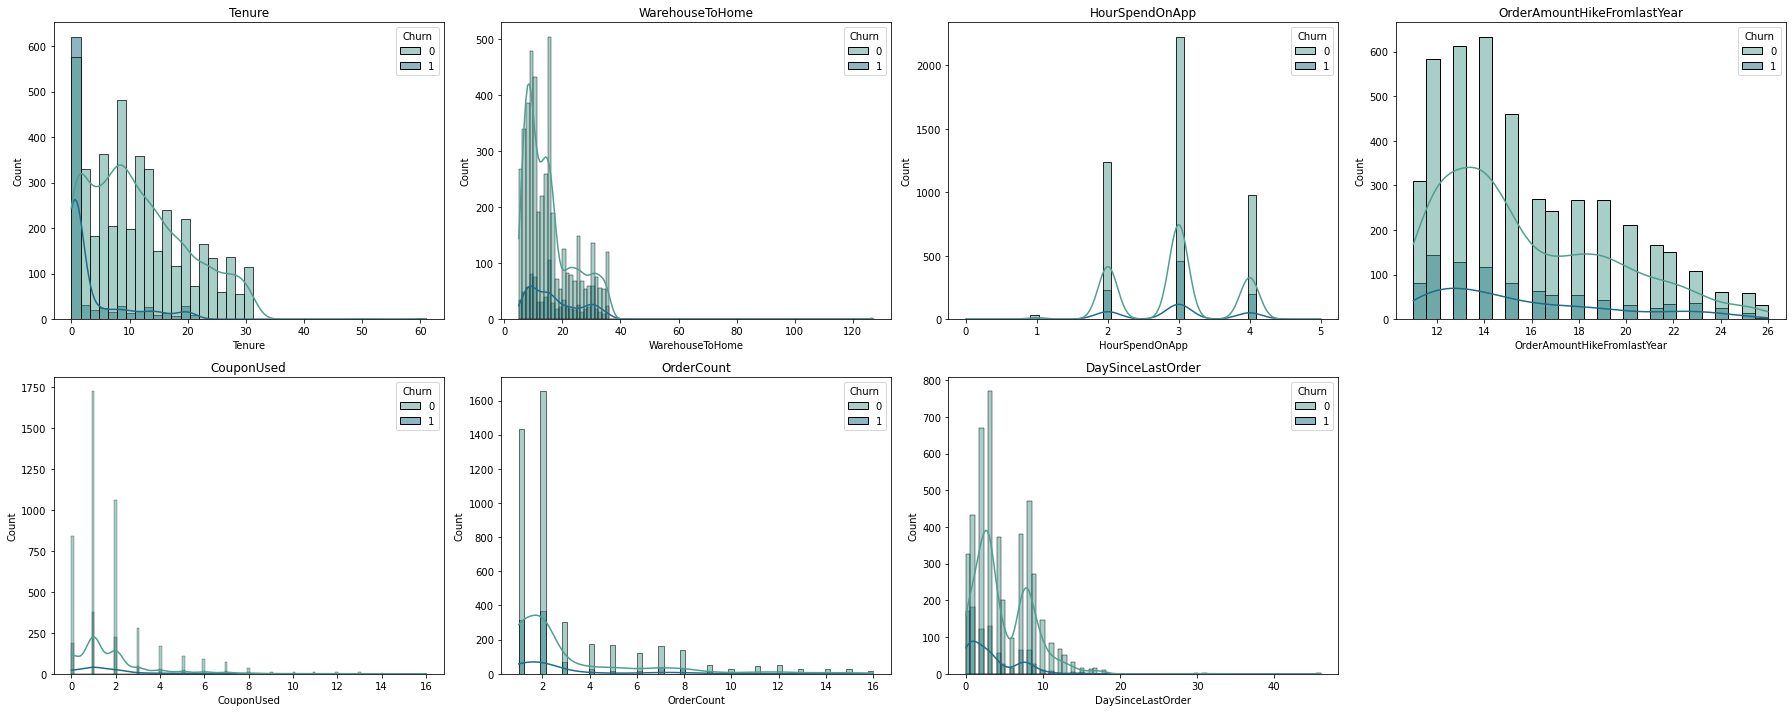

In [22]:
missval = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
plt.figure(figsize=(25, 10))
plotnumber = 1

for feature in missval:
    ax = plt.subplot(2, 4, plotnumber)
    sns.histplot(x=feature, data=df, hue='Churn', kde=True, palette='crest')
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber += 1
    plt.tight_layout();

Setelah melihat penyebaran data menggunakan grafik histogram, terlihat bahwa seluruh fitur missing value merupakan data yang tidak berdistribusi normal atau skewed kekiri ataupu kekanan. Oleh karena itu, kita dapat menggunakan metode Simpleimputer atau pengisian missing value menggunakan nilai median masing-masing kolom.

In [23]:
# Define Iterative Imputer
imp_iter = IterativeImputer(random_state = 0)
df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']] = imp_iter.fit_transform(df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']])
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,159.93
1,1,8.173019,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.000000,120.90
2,1,8.941634,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.000000,120.28
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134.07
4,1,0.000000,Phone,1,12.0,CC,Male,2.806963,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.000000,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.000000,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.000000,150.71
5626,0,13.000000,Mobile Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.092529,224.91
5627,0,1.000000,Mobile Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186.42
5628,0,23.000000,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.000000,178.90


In [24]:
missval_feature = df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']]

In [25]:
df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']] = df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']].astype(int)

In [26]:
# Hasil unique value dari kolom-kolom missing value
for col in missval_feature:
  print(col, '\n', df[col].unique())
  print()

Tenure 
 [ 4  8  0 13 11  9 19 20 14 18  5  2 30  1 23  3 29  6 26 28  7 24 25 10
 15 22 27 16 12 21 17 50 60 31 51 61]

WarehouseToHome 
 [  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  16
  27  17  23  33  19  35  24  25  32  34   5  21 126   7  36 127]

HourSpendOnApp 
 [3 2 1 0 4 5]

OrderAmountHikeFromlastYear 
 [11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26]

CouponUsed 
 [ 1  0  4  2  9  6 11  5  7 12 10  3 13 15  8 14 16]

OrderCount 
 [ 1  6  2 15  4  7  3  9  0 11  5 12 10  8 13 14 16 17]

DaySinceLastOrder 
 [ 5  0  3  7  2  1  8  6  4 15  9 11 10 13 12 17 16 14 30 46 18 31]



In [27]:
# Pengecekan kembali missing value
missval_feature.isna().sum()

Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64

In [28]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype, len(df), df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))* 100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type',' Data Count', 'Missing Value', 'Missing Value Percentage', 'Member of Unique', 'Unique Sample'],
                    data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Member of Unique,Unique Sample
0,Churn,int64,5630,0,0.0,2,"[1, 0]"
1,Tenure,int32,5630,0,0.0,36,"[30, 14]"
2,PreferredLoginDevice,object,5630,0,0.0,3,"[Phone, Mobile Phone]"
3,CityTier,int64,5630,0,0.0,3,"[2, 1]"
4,WarehouseToHome,int32,5630,0,0.0,34,"[27, 14]"
5,PreferredPaymentMode,object,5630,0,0.0,7,"[Credit Card, UPI]"
6,Gender,object,5630,0,0.0,2,"[Male, Female]"
7,HourSpendOnApp,int32,5630,0,0.0,6,"[2, 3]"
8,NumberOfDeviceRegistered,int64,5630,0,0.0,6,"[3, 6]"
9,PreferedOrderCat,object,5630,0,0.0,6,"[Mobile Phone, Laptop & Accessory]"


Jika dilihat, seluruh kolom sudah tidak memiliki missing value. Selanjutnya kita akan mengecek anomali lain yang mungkin saja ada pada data yang kita miliki

### **Check Duplicate**

Data duplikat merupakan suatu baris yang memiliki kesamaan keseluruhan data dalam fiturnya dengan baris yang lain. Hal ini sangat mempengaruhi hasil analisis dan model yang akan dibangun karena. Oleh karena itu, kita akan melakukan pengecekan terlebih dahulu terhadap duplikasi data dan akan dilanjutkan dengan melakukan drop pada duplikasi tersebut. Sehingga, akan menyisakan satu baris saja.

In [29]:
df[df.duplicated()].head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1347,1,8,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,120.90
1359,1,8,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120.28
1395,1,11,Mobile Phone,1,6,Debit Card,Male,3,4,Fashion,3,Single,10,1,13,0,1,0,153.81
1456,1,0,Computer,1,13,Debit Card,Male,3,5,Laptop & Accessory,3,Single,2,1,24,1,1,6,160.74
1485,1,0,Phone,1,15,Credit Card,Female,2,3,Mobile Phone,5,Single,8,0,22,1,1,4,142.00


In [30]:
print(f'Total baris yang duplikat: {df.duplicated().sum()} baris')
print(f'Persentase data duplikat: {df.duplicated().sum()/5630*100}%')

Total baris yang duplikat: 558 baris
Persentase data duplikat: 9.911190053285967%


Pada dataset yang dimiliki, terdapat 558 (9.91% ~ 10%) baris yang memiliki kesamaan dengan baris yang lainnya. duplikasi ini dapat mempengaruhi hasil modeling nantinya. Kita akan melakukan drop untuk semua baris duplikat kecuali baris pertama nya.

In [31]:
# Drop data duplikasi
df = df.drop_duplicates(keep='first')

In [32]:
# Check ulang duplikasi
print(f'Total baris yang duplikat setelah didrop: {df.duplicated().sum()} baris')

Total baris yang duplikat setelah didrop: 0 baris


Seluruh data duplikat telah didrop. Data sudah bersih dari duplikasi. Selanjutnya, kita melakukan pengelompokan terhadap data numerikal dan data kategorikal.

In [33]:
# Numerical Feature

num_feature = df.select_dtypes(exclude='object').columns
num_feature = num_feature.drop(['Churn'])

# Categorical Feature

cat_feature = df.select_dtypes(include='object').columns

### **Checking for Non-standard Value**

Pada tahapan ini, kita akan melakukan pengecekan terhadap fitur-fitur kategorikal yang memiliki anomali. Contohnya terdapat kesalahan manusia dalam pengisian data yang seharusnya termasuk ke dalam kata yang sama tetapi terisi dengan membuat kata yang berbeda.

In [34]:
# Check unique value kolom numerikal
for col in cat_feature:
  print(col, '\n', df[col].unique())
  print()

PreferredLoginDevice 
 ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode 
 ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender 
 ['Female' 'Male']

PreferedOrderCat 
 ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus 
 ['Single' 'Divorced' 'Married']



In [35]:
for cat_name in df.columns:
  if df[cat_name].dtypes == 'object':
    print('Categorical Feature')
    print()
    print('Number of unique Category in {} : {}'.format(cat_name, df[cat_name].nunique()))
    print('The values are: ')
    print(df[cat_name].value_counts())

Categorical Feature

Number of unique Category in PreferredLoginDevice : 3
The values are: 
Mobile Phone    2514
Computer        1456
Phone           1102
Name: PreferredLoginDevice, dtype: int64
Categorical Feature

Number of unique Category in PreferredPaymentMode : 7
The values are: 
Debit Card          2098
Credit Card         1348
E wallet             562
UPI                  360
COD                  322
CC                   248
Cash on Delivery     134
Name: PreferredPaymentMode, dtype: int64
Categorical Feature

Number of unique Category in Gender : 2
The values are: 
Male      3047
Female    2025
Name: Gender, dtype: int64
Categorical Feature

Number of unique Category in PreferedOrderCat : 6
The values are: 
Laptop & Accessory    1847
Mobile Phone          1130
Fashion                763
Mobile                 725
Grocery                365
Others                 242
Name: PreferedOrderCat, dtype: int64
Categorical Feature

Number of unique Category in MaritalStatus : 3
The va

Jika kita lihat dari informasi di atas, bahwa terdapat beberapa data yang diisikan pada kategori yang seharusnya sama akan tetapi pada masalah ini diisi dengan kategori yang lainnya. Dapat dilihat keterangan berikut untuk kesalahannya:

1. PreferredLoginDevice 
    - Mobile Phone, Computer, Phone --> Mobile Phone, Computer
    - Pada kategori phone seharusnya dapat diartikan dengan kategori Mobile Phone, oleh karena itu kita dapat menyatukan datanya.
2. PreferredPaymentMode
    - CC = Credit Card
    - COD = Cash on Delivery
    - Terlihat bahwa, terdapat dua kategori yang memiliki arti yang sama. Satu kategori merupakan singkatan dari kategori lainnya. Oleh karena itu, kita dapat menyatukan data keduanya.

In [36]:
df['PreferredLoginDevice'].replace('Phone','Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace('CC','Credit Card', inplace=True)
df['PreferredPaymentMode'].replace('COD','Cash on Delivery', inplace=True)

In [37]:
for cat_name in df.columns:
  if df[cat_name].dtypes == 'object':
    print('Categorical Feature')
    print()
    print('Number of unique Category in {} : {}'.format(cat_name, df[cat_name].nunique()))
    print('The values are: ')
    print(df[cat_name].value_counts())

Categorical Feature

Number of unique Category in PreferredLoginDevice : 2
The values are: 
Mobile Phone    3616
Computer        1456
Name: PreferredLoginDevice, dtype: int64
Categorical Feature

Number of unique Category in PreferredPaymentMode : 5
The values are: 
Debit Card          2098
Credit Card         1596
E wallet             562
Cash on Delivery     456
UPI                  360
Name: PreferredPaymentMode, dtype: int64
Categorical Feature

Number of unique Category in Gender : 2
The values are: 
Male      3047
Female    2025
Name: Gender, dtype: int64
Categorical Feature

Number of unique Category in PreferedOrderCat : 6
The values are: 
Laptop & Accessory    1847
Mobile Phone          1130
Fashion                763
Mobile                 725
Grocery                365
Others                 242
Name: PreferedOrderCat, dtype: int64
Categorical Feature

Number of unique Category in MaritalStatus : 3
The values are: 
Married     2673
Single      1551
Divorced     848
Name: Mar

### **Handling Outliers (Numerical Features)**

Kita akan mengatasi outlier untuk fitur-fitur numerikal. Umumnyam outlier dapat mempengaruhi hasil statistik saat melakukan proses EDA ataupun dapat mempengaruhi dalam membangun suatu model machine learning. Namun, sebelum kita melakukan drop terhadap outliers, terdapat beberapa hal yang harus diperhatikan. Sebelum kita drop outlier, sebaiknya kita harus menganalisis dataset dengan dan tanpa adanya outlier dan memahami dampak yang lebih baik dari hasilnya. Jika terlihat bahwa outlier tersebut jelas karena salah memasukkan atau mengukur data, tentu kita dapat melakukan drop outlier. Jika terdapat pengaruhi hasil nantinya, kita harus membuang outlier tersebut dari dataset kita. Untuk mengatasi outlier ini kita menggunakan metode Inter Quartile Range (IQR).

In [38]:
# Check unique value kolom numerikal
for col in num_feature:
  print(col, '\n', df[col].unique())
  print()

Tenure 
 [ 4  8  0 13 11  9 19 20 14 18  5  2 30  1 23  3 29  6 26 28  7 24 25 10
 15 22 27 16 12 21 17 50 60 31 51 61]

CityTier 
 [3 1 2]

WarehouseToHome 
 [  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  16
  27  17  23  33  19  35  24  25  32  34   5  21 126   7  36 127]

HourSpendOnApp 
 [3 2 1 0 4 5]

NumberOfDeviceRegistered 
 [3 4 5 2 1 6]

SatisfactionScore 
 [2 3 5 4 1]

NumberOfAddress 
 [ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain 
 [1 0]

OrderAmountHikeFromlastYear 
 [11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26]

CouponUsed 
 [ 1  0  4  2  9  6 11  5  7 12 10  3 13 15  8 14 16]

OrderCount 
 [ 1  6  2 15  4  7  3  9  0 11  5 12 10  8 13 14 16 17]

DaySinceLastOrder 
 [ 5  0  3  7  2  1  8  6  4 15  9 11 10 13 12 17 16 14 30 46 18 31]

CashbackAmount 
 [159.93 120.9  120.28 ... 173.77 287.91 173.78]



In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5072.0,0.165812,0.371949,0.0,0.000,0.00,0.00,1.00
Tenure,5072.0,10.135252,8.401003,0.0,3.000,9.00,15.00,61.00
CityTier,5072.0,1.658715,0.919372,1.0,1.000,1.00,3.00,3.00
WarehouseToHome,5072.0,15.519716,8.412647,5.0,9.000,14.00,19.00,127.00
HourSpendOnApp,5072.0,2.894913,0.729007,0.0,2.000,3.00,3.00,5.00
NumberOfDeviceRegistered,5072.0,3.686120,1.029854,1.0,3.000,4.00,4.00,6.00
SatisfactionScore,5072.0,3.027800,1.384698,1.0,2.000,3.00,4.00,5.00
NumberOfAddress,5072.0,4.194598,2.579325,1.0,2.000,3.00,6.00,22.00
Complain,5072.0,0.282729,0.450370,0.0,0.000,0.00,1.00,1.00
OrderAmountHikeFromlastYear,5072.0,15.692626,3.592478,11.0,13.000,15.00,18.00,26.00


In [40]:
# Check Outliers
for i in df[num_feature].columns:
    if df[i].dtypes != 'object':
      q1 = df[i].quantile(0.25)
      q3 = df[i].quantile(0.75)
      iqr = q3 - q1

      batas = iqr*1.5
      batas_bawah = q1 - batas
      batas_atas = q3 + batas
      means = round(np.mean(df[i]),2)
      total_outlier = df[(df[i] < batas_bawah) | (df[i]> batas_atas)][i].count()
      prct = round(total_outlier/5630*100,3)

      print(i)
      print(f'Nilai Maksimum: {batas_atas}')
      print(f'Nilai Mean: {means}')
      print(f'Nilai Minimum: {batas_bawah}')
      print(f'Jumlah Outlier: {total_outlier}')
      print(f'Persentase Outlier: {prct}%')
      print()

Tenure
Nilai Maksimum: 33.0
Nilai Mean: 10.14
Nilai Minimum: -15.0
Jumlah Outlier: 4
Persentase Outlier: 0.071%

CityTier
Nilai Maksimum: 6.0
Nilai Mean: 1.66
Nilai Minimum: -2.0
Jumlah Outlier: 0
Persentase Outlier: 0.0%

WarehouseToHome
Nilai Maksimum: 34.0
Nilai Mean: 15.52
Nilai Minimum: -6.0
Jumlah Outlier: 137
Persentase Outlier: 2.433%

HourSpendOnApp
Nilai Maksimum: 4.5
Nilai Mean: 2.89
Nilai Minimum: 0.5
Jumlah Outlier: 6
Persentase Outlier: 0.107%

NumberOfDeviceRegistered
Nilai Maksimum: 5.5
Nilai Mean: 3.69
Nilai Minimum: 1.5
Jumlah Outlier: 363
Persentase Outlier: 6.448%

SatisfactionScore
Nilai Maksimum: 7.0
Nilai Mean: 3.03
Nilai Minimum: -1.0
Jumlah Outlier: 0
Persentase Outlier: 0.0%

NumberOfAddress
Nilai Maksimum: 12.0
Nilai Mean: 4.19
Nilai Minimum: -4.0
Jumlah Outlier: 4
Persentase Outlier: 0.071%

Complain
Nilai Maksimum: 2.5
Nilai Mean: 0.28
Nilai Minimum: -1.5
Jumlah Outlier: 0
Persentase Outlier: 0.0%

OrderAmountHikeFromlastYear
Nilai Maksimum: 25.5
Nilai Mean

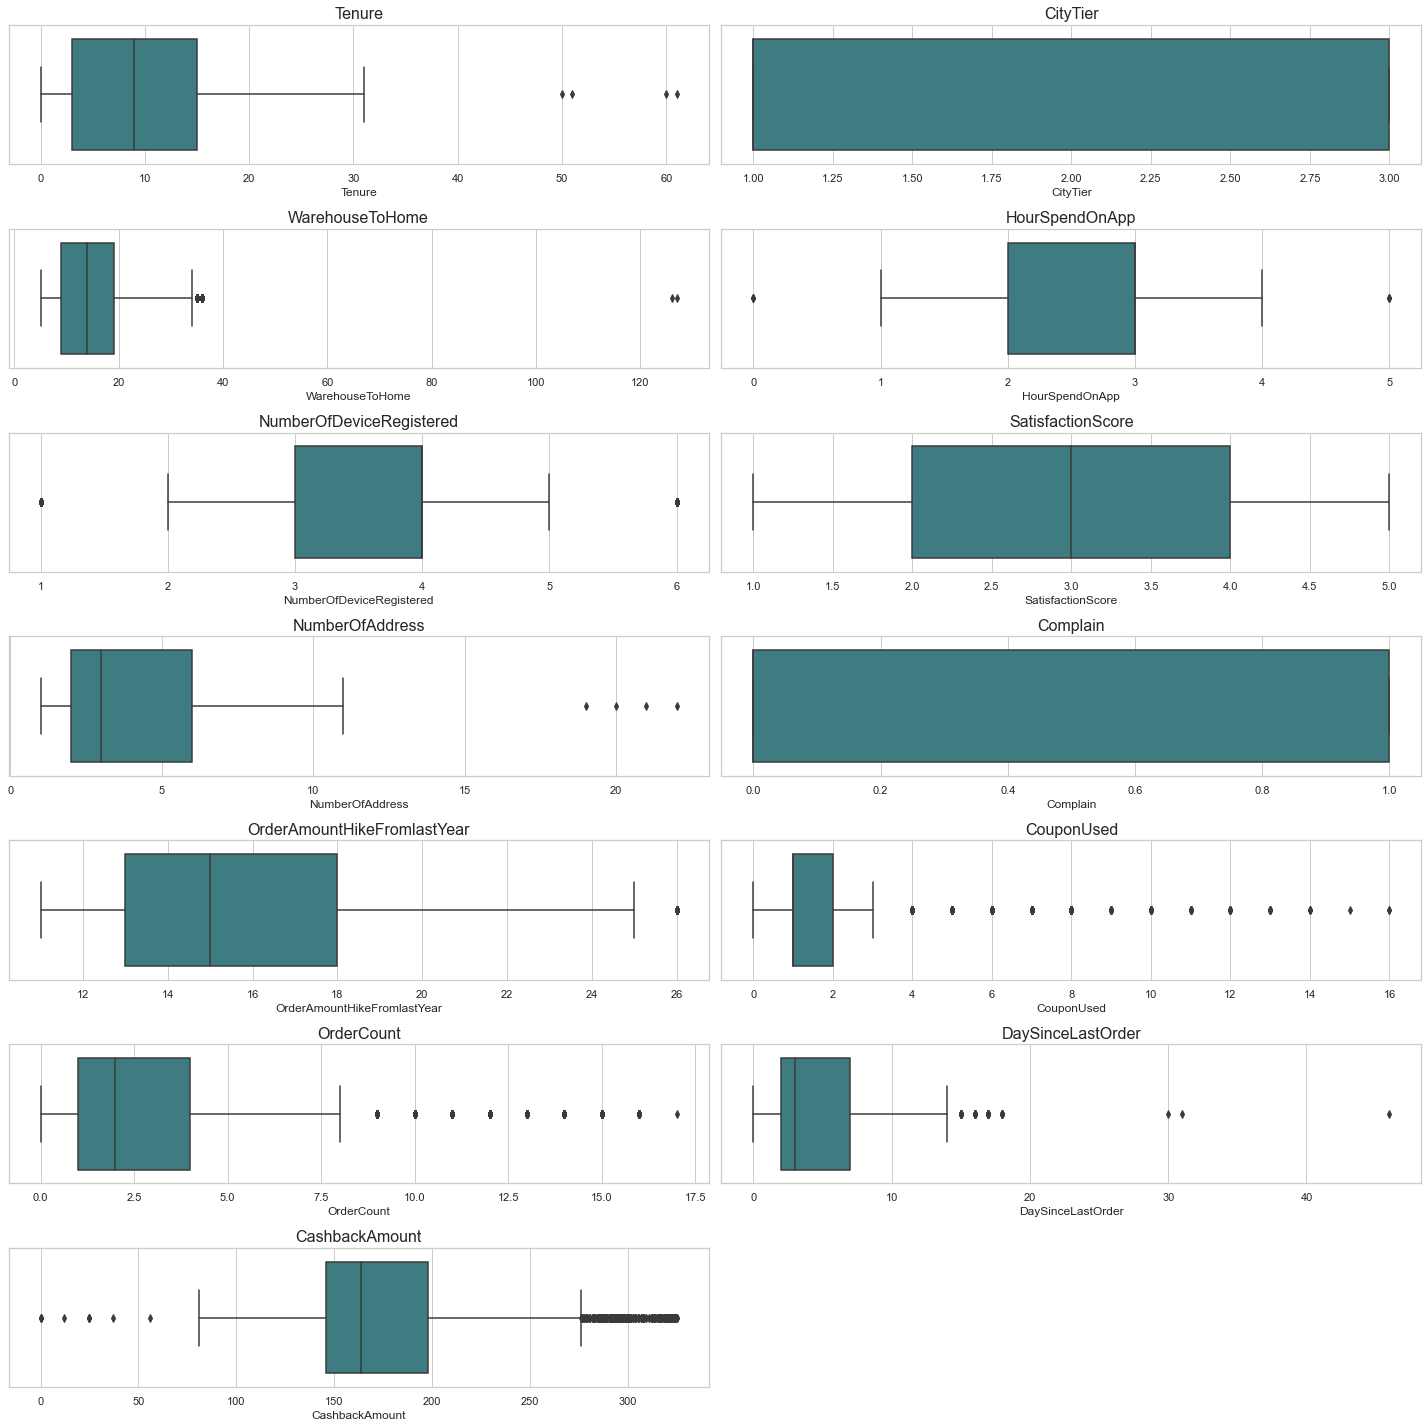

In [41]:
plt.figure(figsize=(20, 20), facecolor='white')
sns.set(style='whitegrid')
plotnumber = 1

for numfeature in num_feature:
    ax = plt.subplot(7,2, plotnumber)
    sns.boxplot(x=numfeature, data=df, palette='crest')
    plt.title(numfeature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

### **Tenure**

Tenure merupakan waktu dalam hitungan bulan untuk customer mulai melakukan registrasi pada aplikasi ecommerce hingga hari terakhir menggunakan aplikasi. Sehingga informasi Tenure merupakan hal yang sangat penting untuk melihat kemungkinan customer yang termasuk kategori churn. Oleh karena itu, kita harus dapat memahami data Tenure ini sebelum melakukan drop pada outliernya.

In [42]:
df['Tenure'].describe()

count    5072.000000
mean       10.135252
std         8.401003
min         0.000000
25%         3.000000
50%         9.000000
75%        15.000000
max        61.000000
Name: Tenure, dtype: float64

In [43]:
df[df['Tenure'] > 33]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
928,0,50,Mobile Phone,1,6,Debit Card,Male,3,1,Laptop & Accessory,3,Divorced,1,0,24,1,2,8,149.00
2719,0,60,Mobile Phone,3,27,Debit Card,Female,3,3,Grocery,1,Married,5,1,13,0,1,0,278.75
3743,0,51,Mobile Phone,1,7,Debit Card,Male,4,2,Laptop & Accessory,3,Divorced,2,0,25,2,3,9,174.00
5534,0,61,Mobile Phone,3,28,Debit Card,Female,4,4,Grocery,1,Married,6,1,16,1,2,1,303.75


Jika dilihat dari data diatas, terdapat 4 customer yang merupakan data outlier. Empat customer tersebut memiliki Tenure diatas batas maksimal outlier untuk Tenure atau dapat dikatakan customer tersebut paling lama menggunakan ecommerce ini. Terlihat pada data, empat customer ini sudah menggunakan aplikasi ecommerce selama 4 - 5+ tahun. Sedangkan rata-rata nilai Tenure adalah 10 bulan atau kurang dari 1 tahun. Karena kolom Tenure merupakan kolom penting untuk melihat customer churn, maka kita tidak akan melakukan drop pada kolom Tenure.

Tenure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,50,51,60,61
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,243,309,12,15,16,15,6,17,60,24,17,9,8,13,14,10,10,4,6,9,14,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,214,310,140,161,169,174,160,188,302,271,188,171,160,150,144,133,127,92,104,116,85,64,65,80,70,52,56,59,61,52,63,46,1,1,1,1


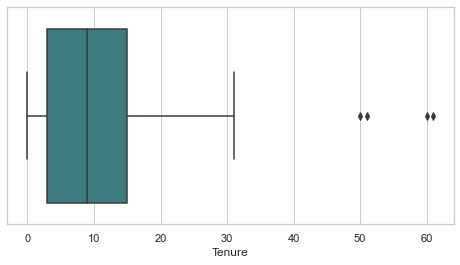

In [44]:
display(pd.crosstab(df['Churn'], df['Tenure']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='Tenure', data=df, hue='Churn', palette = 'crest')
plt.show()

Dari informasi di atas, didapatkan bahwa customer berdasarkan nilai Tenure nya, pemakaian ecommerce yang lebih dari 22 bulan, maka tidak ada customer yang churn. Sedangkan customer yang menggunakan ecommerce hanya kurang lebih 1 bulan, tingkat churn nya sangat tinggi menyetuh 50% dari total customer untuk penggunaan kurang lebih 1 bulan.

### **Warehouse to Home**

Warehouse to home merupakan data jarak gudang ecommerce ke rumah pelanggan. Data ini bisa melihat customer yang churn atau tidak. berdasarkan domain knowledge, kita dapat melihat jika rumah pelanggan semakin jauh dari gudang ecommerce, maka biaya pengiriman barang yang dibeli akan semakin mahal. dan begitu sebaliknya, jika jarak semakin dekat, maka biaya pengiriman akan lebih murah. 

In [45]:
df['WarehouseToHome'].describe()

count    5072.000000
mean       15.519716
std         8.412647
min         5.000000
25%         9.000000
50%        14.000000
75%        19.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

In [46]:
df[df['WarehouseToHome'] > 34]['Churn'].count()

137

WarehouseToHome,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,126,127
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,31,45,54,75,41,30,27,28,45,95,52,25,18,20,15,14,20,15,13,11,12,10,15,18,21,28,17,11,10,14,10,0,0
0,7,252,331,350,431,199,178,169,192,264,319,260,165,61,44,51,61,73,68,63,68,64,60,44,53,63,62,70,49,47,73,38,1,1


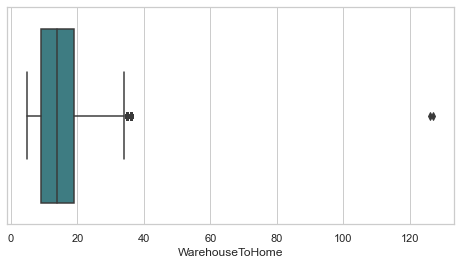

In [47]:
display(pd.crosstab(df['Churn'], df['WarehouseToHome']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='WarehouseToHome', data=df, hue='Churn', palette = 'crest')
plt.show()

Jika dilihat dari informasi di atas, persentase customer kemungkinan akan churn untuk seluruh jarak memiliki persentase hampir sama kecuali untuk jarak 126 dan 127 KM tidak memiliki customer yang churn. Maka, kita dapat melakukan drop keseluruhan data outlier nya.

In [48]:
df[(df['WarehouseToHome']==126.0) | (df['WarehouseToHome']==127.0)]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,0,25,Computer,3,126,Debit Card,Male,2,3,Mobile,1,Married,3,0,15,1,1,0,134.82
4124,0,26,Computer,3,127,Debit Card,Male,3,4,Mobile Phone,1,Married,4,0,16,2,2,1,159.82


### **Hour Spend on App**

In [49]:
df['HourSpendOnApp'].describe()

count    5072.000000
mean        2.894913
std         0.729007
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

HourSpendOnApp,0,1,2,3,4,5
Churn,,,,,,
1,0,0,252,417,172,0
0,3,33,1270,2036,886,3


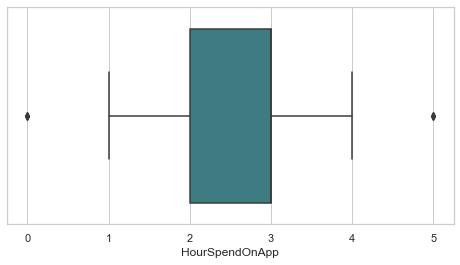

In [50]:
display(pd.crosstab(df['Churn'], df['HourSpendOnApp']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='HourSpendOnApp', data=df, hue='Churn', palette = 'crest')
plt.show()

Dari informasi di atas, kita dapat melakukan drop keseluruhan untuk outlier HourSpendOnAPP karena data outlier tidak terdapat customer churn

### **Number of Device Registered**

NumberOfDeviceRegistered,1,2,3,4,5,6
Churn,,,,,,
1,19,22,221,346,181,52
0,198,233,1301,1787,618,94


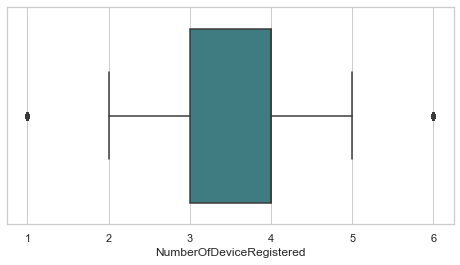

In [51]:
display(pd.crosstab(df['Churn'], df['NumberOfDeviceRegistered']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='NumberOfDeviceRegistered', data=df, hue='Churn', palette = 'crest')
plt.show()

Berdasarkan informasi di atas, data yang outlier memiliki nilai persentase kemungkinan customer churn sangat tinggi dibandingkan yang lain. Maka, kita tidak akan melakukan drop pada outliernya, karena dapat mempengaruhi hasil modeling nantinya

### **Number of Address**

NumberOfAddress,1,2,3,4,5,6,7,8,9,10,11,19,20,21,22
Churn,,,,,,,,,,,,,,,
1,37,211,202,57,61,62,59,59,42,30,19,1,1,0,0
0,305,1034,948,464,452,283,175,190,170,143,65,0,0,1,1


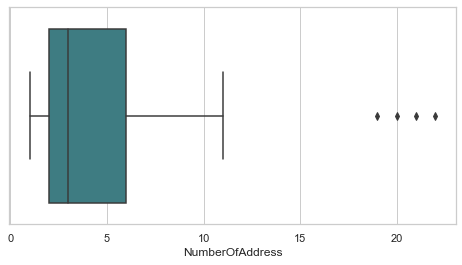

In [52]:
display(pd.crosstab(df['Churn'], df['NumberOfAddress']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='NumberOfAddress', data=df, hue='Churn', palette = 'crest')
plt.show()

In [53]:
df[(df['NumberOfAddress']==19) | (df['NumberOfAddress']==20)]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
260,1,8,Computer,1,10,Cash on Delivery,Male,2,3,Mobile,2,Single,19,1,23,1,1,0,122.85
3075,1,1,Computer,1,11,Cash on Delivery,Male,3,4,Mobile Phone,2,Single,20,1,24,2,2,1,147.85


### **Order Amount Hike From last Year**

OrderAmountHikeFromlastYear,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
Churn,,,,,,,,,,,,,,,,
1,73,132,119,104,81,58,45,47,42,28,21,29,30,19,11,2
0,272,527,561,565,573,312,217,244,242,192,150,135,100,58,56,27


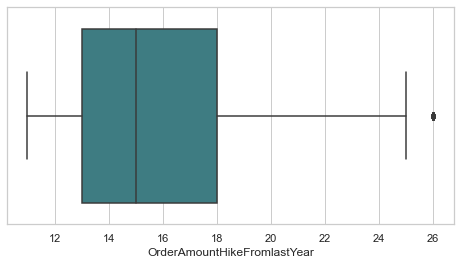

In [54]:
display(pd.crosstab(df['Churn'], df['OrderAmountHikeFromlastYear']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='OrderAmountHikeFromlastYear', data=df, hue='Churn', palette = 'crest')
plt.show()

In [55]:
df[df['OrderAmountHikeFromlastYear'] > 25.5]['Churn'].count()

29

### **Coupon Used**

CouponUsed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Churn,,,,,,,,,,,,,,,,,
1,161,327,198,46,32,23,17,18,9,2,3,2,1,0,0,1,1
0,817,1603,980,282,163,112,101,86,34,11,11,10,8,8,4,0,1


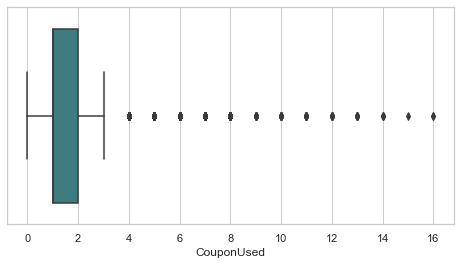

In [56]:
display(pd.crosstab(df['Churn'], df['CouponUsed']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='CouponUsed', data=df, hue='Churn', palette = 'crest')
plt.show()

### **Order Count**

OrderCount,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Churn,,,,,,,,,,,,,,,,,,
1,0,270,322,68,29,15,16,43,33,9,8,6,3,2,5,6,6,0
0,18,1289,1517,318,191,188,124,165,139,56,30,44,51,29,28,25,18,1


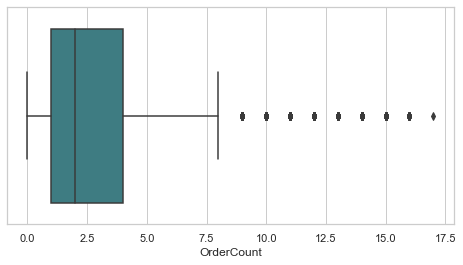

In [57]:
display(pd.crosstab(df['Churn'], df['OrderCount']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='OrderCount', data=df, hue='Churn', palette = 'crest')
plt.show()

In [58]:
df[df['OrderCount'] > 8]['Churn'].count()

327

### **Day Since Last Order**

DaySinceLastOrder,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,30,31,46
Churn,,,,,,,,,,,,,,,,,,,,,,
1,142,154,112,128,60,33,20,68,67,25,11,8,4,1,4,3,0,0,0,0,0,1
0,286,387,617,766,400,190,102,371,447,248,135,84,70,47,28,14,12,16,9,1,1,0


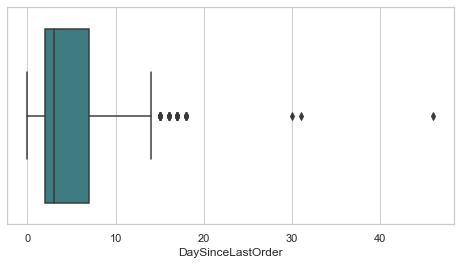

In [59]:
display(pd.crosstab(df['Churn'], df['DaySinceLastOrder']).sort_values('Churn', ascending=False))

plt.figure(figsize=(8,4))
sns.boxplot(x='DaySinceLastOrder', data=df, hue='Churn', palette = 'crest')
plt.show()

In [60]:
df[df['DaySinceLastOrder'] > 14.5]['Churn'].count()

57

**Handling with IQR**

In [61]:
# Handling with IQR
Q1 = (df[["HourSpendOnApp", "NumberOfAddress", "OrderAmountHikeFromlastYear", "DaySinceLastOrder"]]).quantile(0.25)
Q3 = (df[["HourSpendOnApp", "NumberOfAddress", "OrderAmountHikeFromlastYear", "DaySinceLastOrder"]]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than = (df > maximum)
lower_than = (df < minimum)

df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

print()
print('Persebaran data setelah ditangani Outlier: ')
print(df[["HourSpendOnApp", "NumberOfAddress", "OrderAmountHikeFromlastYear", "DaySinceLastOrder"]].describe())

Nilai Maximum dari masing-masing Variable adalah: 
HourSpendOnApp                  4.5
NumberOfAddress                12.0
OrderAmountHikeFromlastYear    25.5
DaySinceLastOrder              14.5
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
HourSpendOnApp                 0.5
NumberOfAddress               -4.0
OrderAmountHikeFromlastYear    5.5
DaySinceLastOrder             -5.5
dtype: float64

Persebaran data setelah ditangani Outlier: 
       HourSpendOnApp  NumberOfAddress  OrderAmountHikeFromlastYear  \
count     5072.000000      5072.000000                  5072.000000   
mean         2.894913         4.187894                    15.689767   
std          0.727179         2.547592                     3.584463   
min          0.500000         1.000000                    11.000000   
25%          2.000000         2.000000                    13.000000   
50%          3.000000         3.000000                    15.000000   
75%          3.000000         6.000000   

**Limitasi Data**

**Warehouse to Home**

In [62]:
df = df[(df['WarehouseToHome'] < 126)]

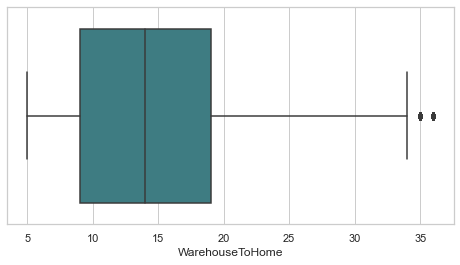

In [63]:
plt.figure(figsize=(8,4))
sns.boxplot(x='WarehouseToHome', data=df, hue='Churn', palette = 'crest')
plt.show()

**Coupon Used**

In [64]:
pd.crosstab(df['Churn'], df['CouponUsed']).sort_values('Churn', ascending=False)

CouponUsed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Churn,,,,,,,,,,,,,,,,,
1,161,327,198,46,32,23,17,18,9,2,3,2,1,0,0,1,1
0,817,1602,979,282,163,112,101,86,34,11,11,10,8,8,4,0,1


In [65]:
df = df[(df['CouponUsed'] < 9.0)]

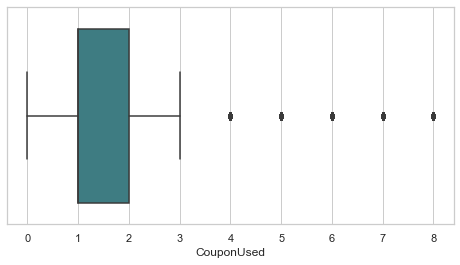

In [66]:
plt.figure(figsize=(8,4))
sns.boxplot(x='CouponUsed', data=df, hue='Churn', palette = 'crest')
plt.show()

**Order Count**

In [67]:
pd.crosstab(df['Churn'], df['OrderCount']).sort_values('Churn', ascending=False)

OrderCount,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Churn,,,,,,,,,,,,,,,,,
1,0,270,322,68,29,15,16,43,33,8,7,5,2,2,5,3,3
0,18,1288,1516,318,191,188,124,165,139,54,25,40,40,19,24,20,7


In [68]:
df = df[(df['OrderCount'] < 9.0)]

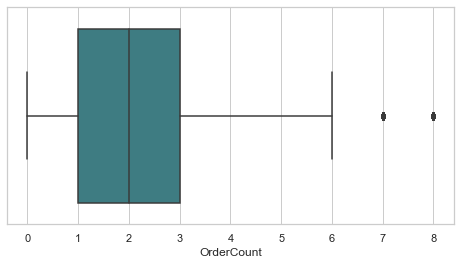

In [69]:
plt.figure(figsize=(8,4))
sns.boxplot(x='OrderCount', data=df, hue='Churn', palette = 'crest')
plt.show()

**Cashback Amount**

In [70]:
pd.crosstab(df['Churn'], df['CashbackAmount']).sort_values('Churn', ascending=False)

CashbackAmount,0.00,12.00,25.00,56.00,81.00,110.09,110.51,110.52,110.81,110.91,111.02,111.18,111.29,112.00,112.23,112.32,112.61,112.74,112.81,113.59,113.93,114.16,114.20,114.83,115.14,115.55,115.63,115.69,116.01,116.11,116.75,117.02,117.06,117.90,118.59,118.78,119.04,119.51,120.01,120.07,120.08,120.11,120.13,120.14,120.18,120.22,120.24,120.28,120.29,120.33,120.42,120.44,120.45,120.58,120.61,120.62,120.64,120.66,120.70,120.73,120.74,120.75,120.80,120.83,120.86,120.88,120.89,120.90,120.93,120.96,120.97,120.99,121.05,121.07,121.09,121.15,121.19,121.21,121.27,121.32,121.33,121.41,121.43,121.44,121.45,121.48,121.53,121.54,121.57,121.66,121.68,121.74,121.76,121.77,121.80,121.87,121.94,122.01,122.06,122.07,122.10,122.13,122.16,122.18,122.20,122.26,122.31,122.32,122.35,122.38,122.44,122.58,122.59,122.67,122.69,122.70,122.72,122.74,122.75,122.77,122.79,122.85,122.88,122.89,122.90,122.93,122.96,122.97,123.02,123.05,123.06,123.07,123.08,123.11,123.13,123.14,123.18,123.19,123.21,123.22,123.23,123.25,123.26,123.28,123.29,123.32,123.35,123.40,123.41,123.42,123.45,123.48,123.51,123.56,123.62,123.66,123.67,123.68,123.70,123.72,123.73,123.76,123.77,123.79,123.80,123.87,123.89,123.94,123.98,124.00,124.04,124.06,124.08,124.13,124.22,124.26,124.30,124.32,124.36,124.37,124.38,124.39,124.40,124.50,124.51,124.55,124.61,124.68,124.72,124.76,124.78,124.79,124.96,125.00,125.01,125.06,125.14,125.15,125.17,125.19,125.23,125.32,125.34,125.39,125.43,125.44,125.46,125.52,125.53,125.59,125.61,125.64,125.66,125.70,125.71,125.72,125.76,125.79,125.80,125.85,125.87,125.92,125.93,125.96,126.00,126.10,126.13,126.19,126.22,126.25,126.32,126.42,126.44,126.45,126.47,126.54,126.55,126.57,126.59,126.60,126.61,126.62,126.70,126.78,126.79,126.83,126.84,126.86,126.90,126.91,126.93,126.94,126.95,126.96,127.00,127.03,127.05,127.06,127.07,127.13,127.16,127.18,127.20,127.23,127.25,127.28,127.41,127.42,127.43,127.56,127.59,127.60,127.66,127.68,127.73,127.74,127.78,127.81,127.82,127.83,127.85,127.89,127.91,127.93,127.94,127.95,127.99,128.00,128.04,128.09,128.10,128.11,128.14,128.18,128.19,128.21,128.27,128.35,128.36,128.37,128.38,128.44,128.51,128.53,128.56,128.58,128.59,128.62,128.63,128.67,128.71,128.75,128.86,128.89,128.97,128.99,129.04,129.09,129.11,129.26,129.29,129.32,129.33,129.35,129.36,129.42,129.50,129.56,129.60,129.66,129.72,129.73,129.74,129.76,129.77,129.79,129.83,129.91,129.94,129.96,130.22,130.33,130.38,130.41,130.55,130.57,130.58,130.65,130.67,130.68,130.69,130.72,131.02,131.17,131.31,131.40,131.43,131.49,131.61,131.62,131.72,131.80,131.95,131.96,132.01,132.02,132.04,132.11,132.12,132.21,132.29,132.30,132.80,132.91,132.94,132.95,132.98,133.06,133.10,133.12,133.19,133.39,133.46,133.75,133.76,133.77,133.88,134.00,134.07,134.08,134.19,134.20,134.23,134.24,134.33,134.41,134.45,134.47,134.48,134.52,134.64,134.68,134.77,134.79,134.82,134.85,134.91,135.00,135.05,135.06,135.09,135.17,135.37,135.39,135.40,135.44,135.51,135.52,135.64,135.78,135.79,135.80,135.81,135.91,135.97,136.00,136.02,136.17,136.18,136.22,136.29,136.33,136.46,136.60,136.69,136.73,136.81,136.88,136.90,136.91,136.92,137.00,137.02,137.08,137.22,137.23,137.30,137.32,137.37,137.43,137.48,137.55,137.60,137.61,137.74,137.80,137.81,137.85,138.12,138.15,138.16,138.33,138.38,138.59,138.67,138.75,138.86,138.93,138.94,139.02,139.04,139.07,139.16,139.17,139.19,139.20,139.29,139.31,139.36,139.44,139.55,139.68,139.75,139.77,139.78,139.83,139.86,139.89,140.00,140.01,140.11,140.14,140.25,140.28,140.31,140.33,140.35,140.37,140.51,140.55,140.63,140.66,140.69,140.71,140.78,140.81,140.84,140.87,140.89,141.01,141.03,141.05,141.07,141.08,141.11,141.15,141.27,141.48,141.57,141.62,141.63,141.71,141.75,141.87,141.89,141.93,141.94,141.97,141.98,142.00,142.02,142.06,142.13,142.21,142.27,142.30,142.33,142.40,142.44,142.49,142.56,142.57,142.58,142.60,142.62,142.72,142.84,142.85,142.86,142.90,142.94,142.98,143.02,143.06,143.12,143.17,143.19,143.20,143.23,143.25,143.27,143.32,143.35,143.42,143.45,143.59,143.64,143.73,143.74,143.77,1

In [71]:
df = df[df['CashbackAmount'] > 67.8625]

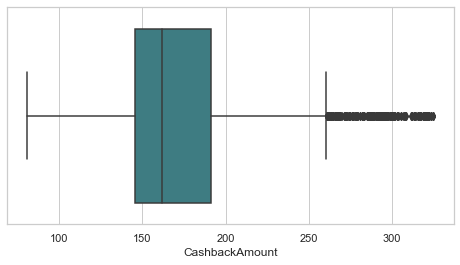

In [72]:
plt.figure(figsize=(8,4))
sns.boxplot(x='CashbackAmount', data=df, hue='Churn', palette = 'crest')
plt.show()

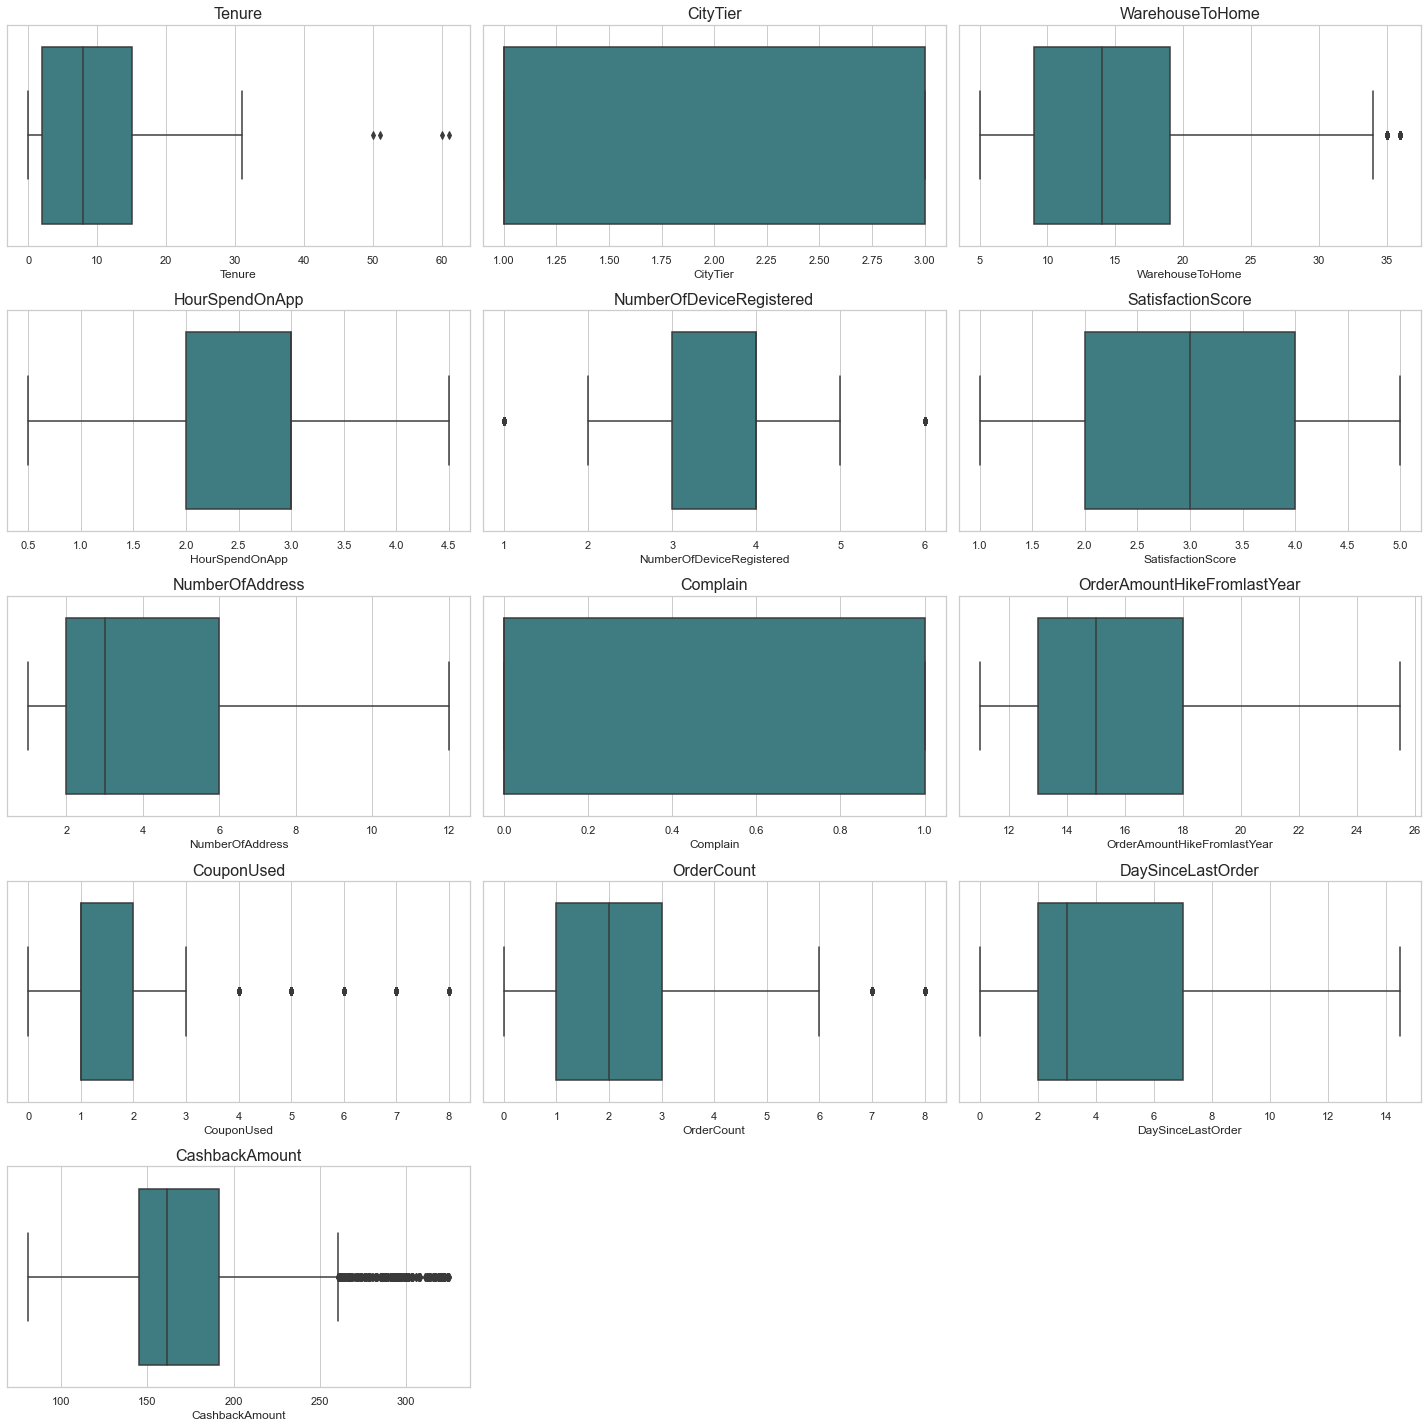

In [73]:
plt.figure(figsize=(20, 20), facecolor='white')
sns.set(style='whitegrid')
plotnumber = 1

for numfeature in num_feature:
    ax = plt.subplot(5,3, plotnumber)
    sns.boxplot(x=numfeature, data=df, palette='crest')
    plt.title(numfeature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

## **Data Analysis/Exploratory Data Analysis (EDA)**

### **EDA Numerical Features**

In [74]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000,4735.000000
mean,0.168110,9.815839,1.655755,15.481309,2.891552,3.672650,3.023020,4.199789,0.285322,15.688912,1.536431,2.520169,4.276980,174.471937
std,0.374003,8.336088,0.917704,8.085100,0.727654,1.034533,1.383292,2.547438,0.451615,3.555263,1.454526,1.895552,3.279315,46.251152
min,0.000000,0.000000,1.000000,5.000000,0.500000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,81.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.355000
50%,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,161.600000
75%,0.000000,15.000000,3.000000,19.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,191.440000
max,1.000000,61.000000,3.000000,36.000000,4.500000,6.000000,5.000000,12.000000,1.000000,25.500000,8.000000,8.000000,14.500000,324.730000


**CityTier**

Penyebaran Customer berdasarkan City Tier:


CityTier,1,2,3
Churn,,,
1,434,34,328
0,2655,153,1131


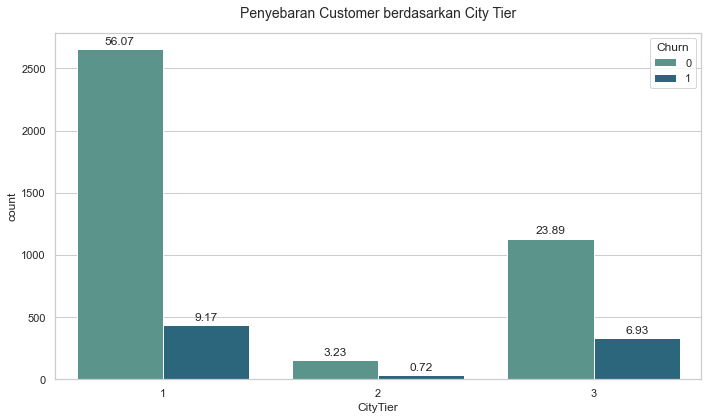


Persentase Kemungkinan Customer Churn:


,CityTier,Churn
2,3,0.224812
1,2,0.181818
0,1,0.140499


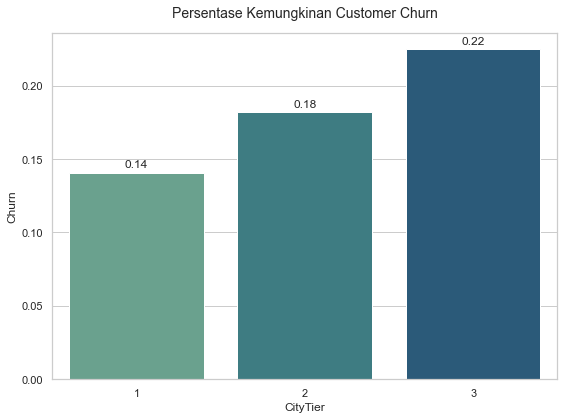

In [75]:
print('Penyebaran Customer berdasarkan City Tier:')
display(pd.crosstab(df['Churn'], df['CityTier']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='CityTier', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')

plt.title('Penyebaran Customer berdasarkan City Tier', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_CityTier = df.pivot_table(values='Churn', index='CityTier', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_CityTier)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='CityTier', y='Churn', data = df_CityTier, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')

plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

**Berdasarkan grafik persentase kemungkinan customer churn:**
- Kita dapat melihat persentase kemungkinan customer akan churn dari setiap **unique value**. Data grafik tersebut diperoleh dengan cara total churn per unique value dibagi dengan total keseluruhan customer per unique value dikali seratus. 

Diketahui Pengelompokan Tier daerah di Indonesia:
- Tier 1: merupakan metropolitans seperti, Jakarta, Bandung, Surabaya, dll
- Tier 2: merupakan rising urbanites seperti, Semarang, Makasar, Denpasar, dll
- Tier 3: merupakan slow adopters seperti, Magelang, Prabumulih, Bangli, dll

Pada grafik Penyebaran Customer berdasarkan City Tier:
- Persentase Customer yang berada di Tier 1 (65%), Tier 2 (4%) dan Tier 3 (31%).

Pada grafik Persentase Kemungkinan Customer Churn:
- Customer yang berada di Tier 3 tingkat churnnya lebih tinggi yaitu (23%). Tingkat churn customer yang berada di 2 (18%) dan 1 (14%).

**Hour Spend On App**

Penyebaran Customer berdasarkan Hour Spend On App:


HourSpendOnApp,0.5,1.0,2.0,3.0,4.0,4.5
Churn,,,,,,
1,0,0,234,395,167,0
0,3,31,1197,1889,817,2


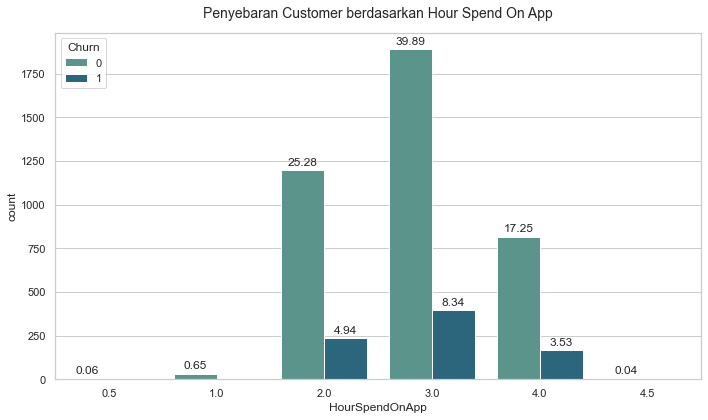


Persentase Kemungkinan Customer Churn:


,HourSpendOnApp,Churn
3,3.0,0.172942
4,4.0,0.169715
2,2.0,0.163522
0,0.5,0.000000
1,1.0,0.000000
5,4.5,0.000000


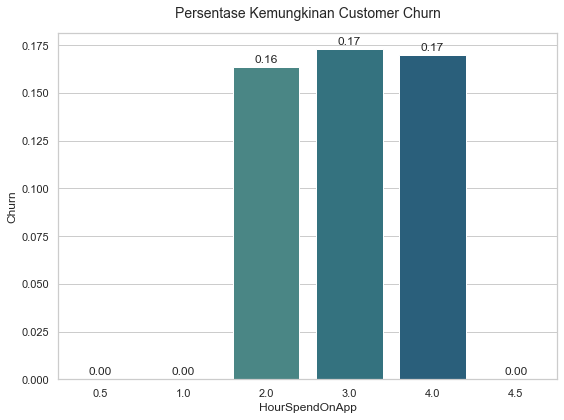

In [76]:
print('Penyebaran Customer berdasarkan Hour Spend On App:')
display(pd.crosstab(df['Churn'], df['HourSpendOnApp']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='HourSpendOnApp', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Hour Spend On App', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_HourSpendOnApp = df.pivot_table(values='Churn', index='HourSpendOnApp', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_HourSpendOnApp)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='HourSpendOnApp', y='Churn', data = df_HourSpendOnApp, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Pada grafik Penyebaran Customer berdasarkan Hour Spend On App:
- Jumlah Customer yang paling banyak menggunakan E commerce selama 3 jam yaitu (52%).

Pada grafik Persentase Kemungkinan Customer Churn:
- Customer yang kurang dari 3 jam menggunakan E commerce (18%) tingkat churnnya cenderung rendah.

**Number Of Device Registered**

Penyebaran Customer berdasarkan Number Of Device Registered:


NumberOfDeviceRegistered,1,2,3,4,5,6
Churn,,,,,,
1,17,20,207,330,173,49
0,194,226,1219,1653,564,83


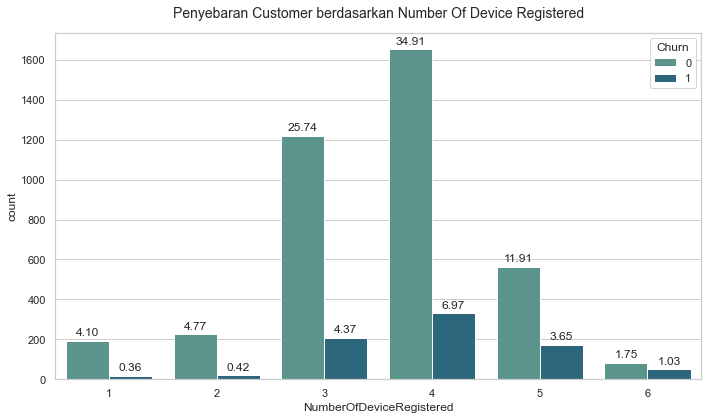


Persentase Kemungkinan Customer Churn:


,NumberOfDeviceRegistered,Churn
5,6,0.371212
4,5,0.234735
3,4,0.166415
2,3,0.145161
1,2,0.081301
0,1,0.080569


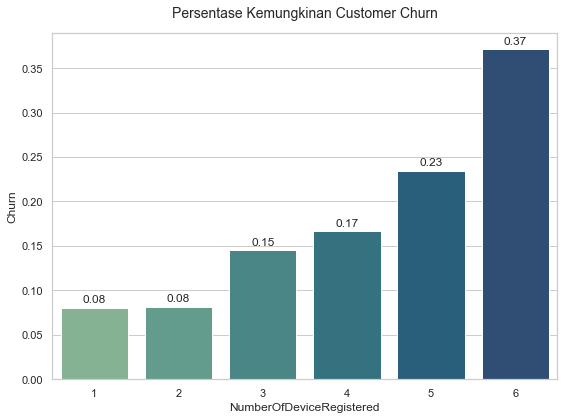

In [77]:
print('Penyebaran Customer berdasarkan Number Of Device Registered:')
display(pd.crosstab(df['Churn'], df['NumberOfDeviceRegistered']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='NumberOfDeviceRegistered', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Number Of Device Registered', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_NumberOfDeviceRegistered = df.pivot_table(values='Churn', index='NumberOfDeviceRegistered', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_NumberOfDeviceRegistered)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='NumberOfDeviceRegistered', y='Churn', data = df_NumberOfDeviceRegistered, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Pada grafik Penyebaran Customer berdasarkan Number Of Device Registered:
- Jumlah perangkat yang terdaftar oleh Customer paling tinggi adalah 4 perangkat (42%) dan yang paling rendah adalah 6 perangkat (3%).

Pada grafik Persentase Kemungkinan Customer Churn:
- Customer yang mendaftarkan banyak perangkat churnnya tinggi yaitu 6 perangkat (38%) dan Customer yang mendaftarkan paling sedikit perangkat yaitu 1 perangkat (8%).


**Satisfaction Score**

Penyebaran Customer berdasarkan Satisfaction Score:


SatisfactionScore,1,2,3,4,5
Churn,,,,,
1,118,68,246,149,215
0,892,479,1155,729,684


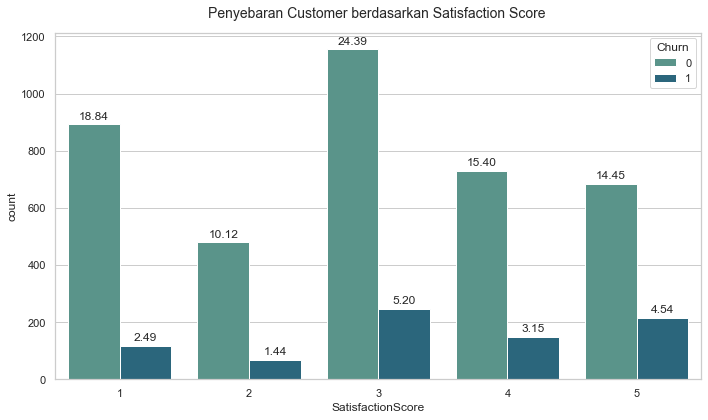


Persentase Kemungkinan Customer Churn:


,SatisfactionScore,Churn
4,5,0.239155
2,3,0.175589
3,4,0.169704
1,2,0.124314
0,1,0.116832


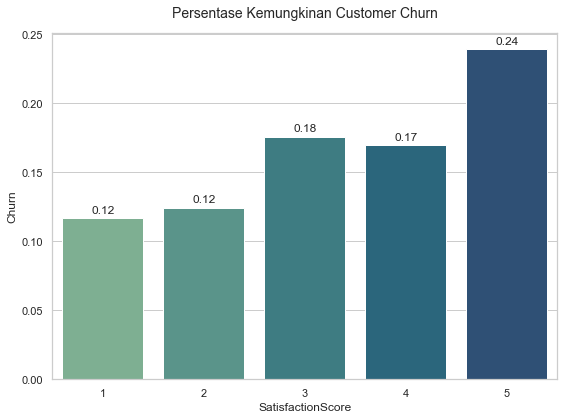

In [78]:
print('Penyebaran Customer berdasarkan Satisfaction Score:')
display(pd.crosstab(df['Churn'], df['SatisfactionScore']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='SatisfactionScore', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Satisfaction Score ', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_SatisfactionScore = df.pivot_table(values='Churn', index='SatisfactionScore', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_SatisfactionScore)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='SatisfactionScore', y='Churn', data = df_SatisfactionScore, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Penyebaran Customer berdasarkan Satisfaction Score:
- Tingkat kepuasan Customer lebih banyak memilih tingkat kepuasan score 3(30%) dan paling sedikit memilih tingkat kepuasan score 2 (12%).

Persentase Kemungkinan Customer Churn:
- Customer yang memilih score 5 tingkat churnnya tinggi sebanyak (24%) dan Customer yang memilih score 1 tingkat churnya rendah (12%).

In [79]:
df3=df[(df['SatisfactionScore']==5) & (df['Churn']==1)][['Churn','CouponUsed']]

print(round(df3.value_counts()/df3.shape[0]*100))
df4=df[(df['SatisfactionScore']==1) & (df['Churn']==1)][['Churn','CouponUsed']]

print(round(df4.value_counts()/df4.shape[0]*100))

Churn  CouponUsed
1      1             43.0
       2             27.0
       0             21.0
       3              5.0
       4              3.0
       5              1.0
dtype: float64
Churn  CouponUsed
1      1             38.0
       0             22.0
       2             19.0
       4              8.0
       3              7.0
       5              4.0
       6              2.0
       7              1.0
dtype: float64


Kenapa Customer yang memberi score 5 yang memiliki persentase paling besar akan churn?

Setelah melihat feature lain, ternyata Customer yang memberikan score 5 churn ratenya tinggi adalah Customer yang memiliki tenure tinggi di awal bulan. Kebanyakan Customer menggunakan kupon 1 dan 2 kali dan melakukan order paling banyak 1 hingga 2 order.

**Complain**

Penyebaran Customer berdasarkan Complain:


Complain,0,1
Churn,,
1,363,433
0,3021,918


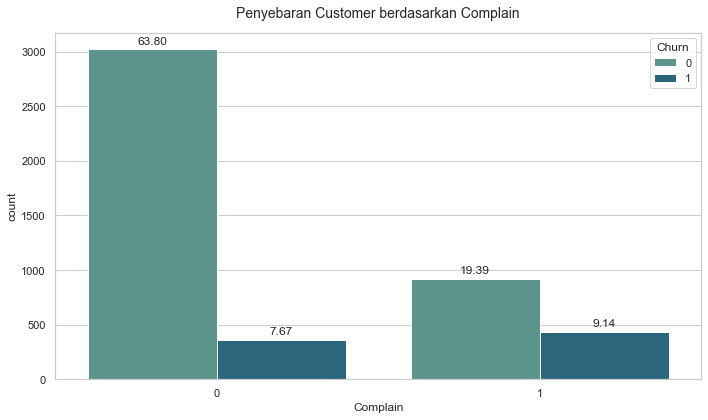


Persentase Kemungkinan Customer Churn:


,Complain,Churn
1,1,0.320503
0,0,0.107270


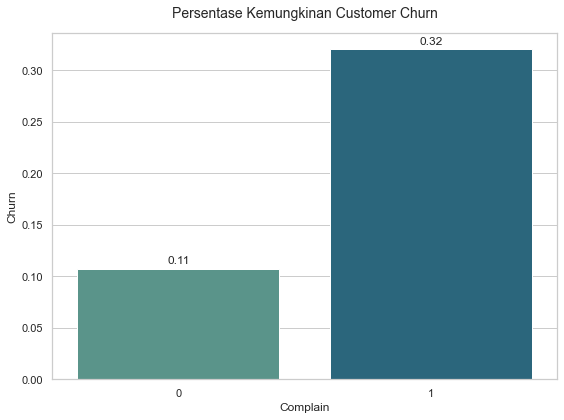

In [80]:
print('Penyebaran Customer berdasarkan Complain:')
display(pd.crosstab(df['Churn'], df['Complain']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Complain', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Complain', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_Complain = df.pivot_table(values='Churn', index='Complain', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_Complain)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Complain', y='Churn', data = df_Complain, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Pada grafik Penyebaran Customer berdasarkan Complain:
- Persentase Customer yang tidak complain sebesar (72%) dan Customer yang complain sebesar (29%).

Pada grafik persentase kemungkinan customer churn:
- Customer yang complain berpotensi churn sebanyak (32%) dan Persentase customer churn yang tidak complain sebanyak (11%).

**Coupon Used**

Penyebaran Customer berdasarkan CouponUsed:


CouponUsed,0,1,2,3,4,5,6,7,8
Churn,,,,,,,,,
1,161,324,195,44,29,18,11,9,5
0,807,1578,950,262,130,82,68,44,18


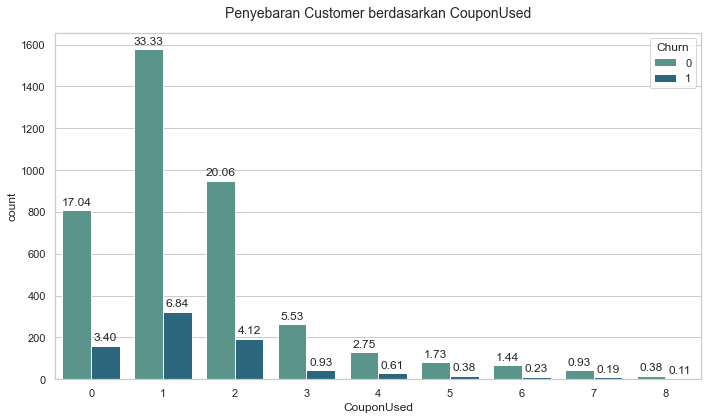


Persentase Kemungkinan Customer Churn:


,CouponUsed,Churn
8,8,0.217391
4,4,0.182390
5,5,0.180000
1,1,0.170347
2,2,0.170306
7,7,0.169811
0,0,0.166322
3,3,0.143791
6,6,0.139241


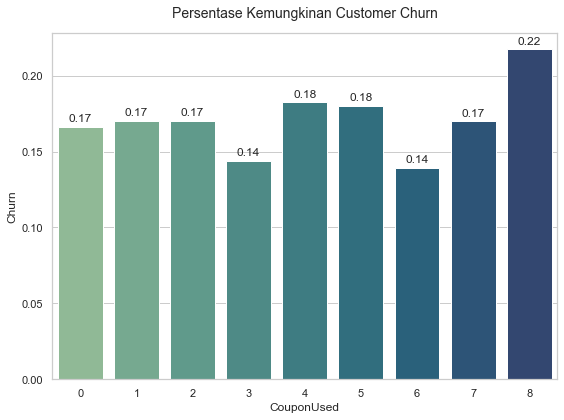

In [81]:
print('Penyebaran Customer berdasarkan CouponUsed:')
display(pd.crosstab(df['Churn'], df['CouponUsed']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='CouponUsed', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan CouponUsed', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_CouponUsed = df.pivot_table(values='Churn', index='CouponUsed', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_CouponUsed)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='CouponUsed', y='Churn', data = df_CouponUsed, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Penyebaran customer berdasarkan coupon used:
- Persentase Customer yang telah menggunakan satu kupon (42%) dan Customer yang menggunakan lebih dari satu kali kupon (39%). Customer yang tidak menggunakan kupon (19%).

Persentase kemungkinan customer churn:
- Customer churn yang tinggi menggunakan 8 kali kupon (24%) dan Customer churn rendah menggunakan 6 kali kupon (14%).



In [82]:
df3=df[(df['CouponUsed']==8) & (df['Churn']==1)][['Churn','Complain']]

print(round(df3.value_counts()/df3.shape[0]*100))
df4=df[(df['CouponUsed']==1) & (df['Churn']==1)][['Churn','Complain']]

print(round(df4.value_counts()/df4.shape[0]*100))

Churn  Complain
1      0           60.0
       1           40.0
dtype: float64
Churn  Complain
1      1           52.0
       0           48.0
dtype: float64


kenapa customer yang memakaian  8 kali kupon malah lebih besar churnnya? padahal jumlah customernya sedikit.

Setelah melihat feature lain, ternyata Customer yang memakai 8 kali kupon churn ratenya tinggi adalah Customer yang banyak menggunakan cashback dan lebih banyak pengguna lama. Dalam satu bulan Customer memesan banyak barang sampai 8 order, namun jumlah customernya sedikit. Pada feature complain banyak Customer yang tidak melakukan complain.

**Tenure**

In [83]:
df2 = df.copy()
def Tenure(x):
    if x < 6:
        return 1
    elif (x >= 6) and (x <= 11):
        return 2
    elif (x >= 12) and (x <= 17):
        return 3
    elif (x >= 18) and (x <= 23):
        return 4
    elif (x >= 24) and (x <= 29):
        return 5
    else:
        return 6

df2['Tenuregrup'] = df2['Tenure'].apply(Tenure)
df2.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenuregrup
0,1,4,Mobile Phone,3,6,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1,1,5.0,159.93,1
1,1,8,Mobile Phone,1,8,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0,1,0.0,120.90,2
2,1,8,Mobile Phone,1,30,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0,1,3.0,120.28,2
3,1,0,Mobile Phone,3,15,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0,1,3.0,134.07,1
4,1,0,Mobile Phone,1,12,Credit Card,Male,2.0,3,Mobile,5,Single,3,0,11.0,1,1,3.0,129.60,1


Penyebaran Customer berdasarkan Tenure:


Tenuregrup,1,2,3,4,5,6
Churn,,,,,,
1,581,127,59,29,0,0
0,1144,1223,706,459,309,98


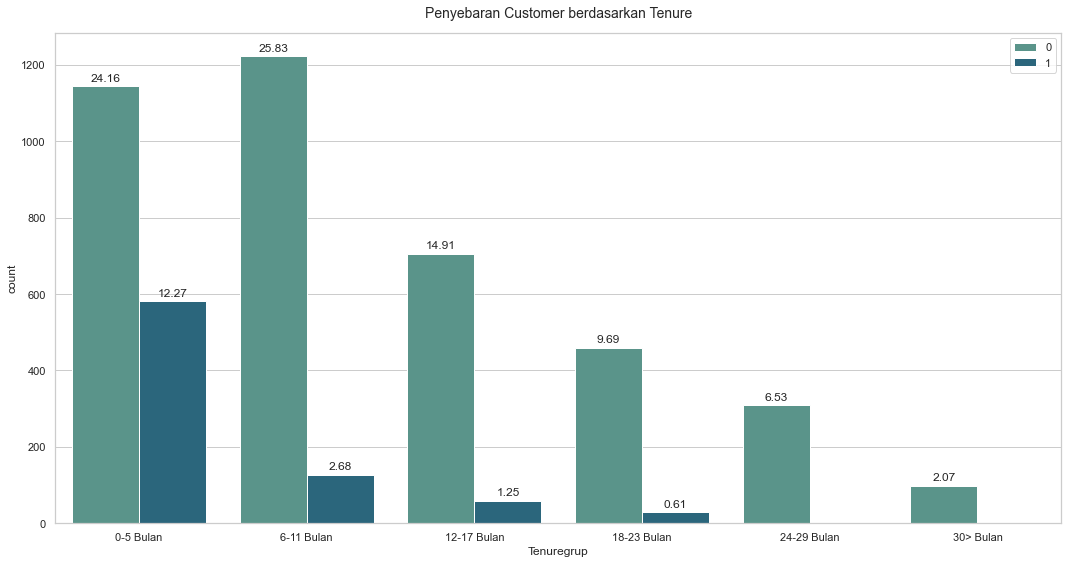


Persentase Kemungkinan Customer Churn:


,Tenuregrup,Churn
0,1,0.336812
1,2,0.094074
2,3,0.077124
3,4,0.059426
4,5,0.000000
5,6,0.000000


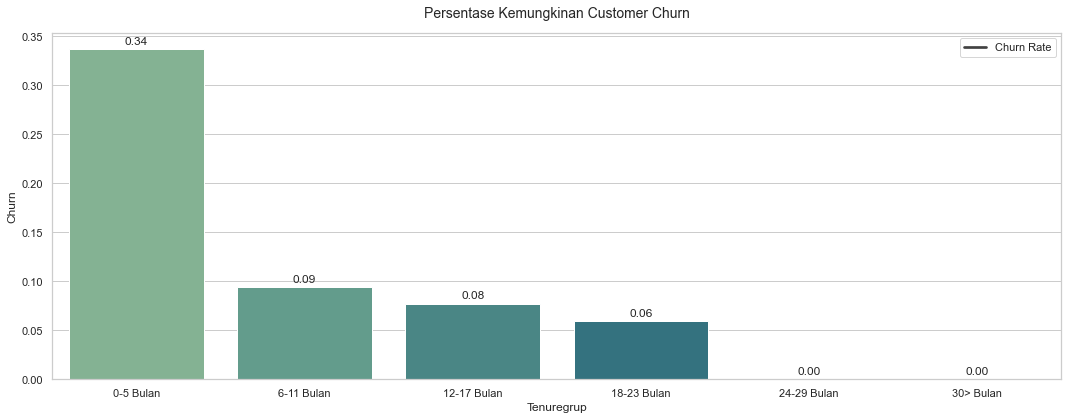

In [84]:
print('Penyebaran Customer berdasarkan Tenure:')
display(pd.crosstab(df2['Churn'], df2['Tenuregrup']).sort_values(by='Churn', ascending=False))
print()

plt.figure(figsize=(15,8))
ax = sns.countplot(x='Tenuregrup', data=df2, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df2.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')

plt.title('Penyebaran Customer berdasarkan Tenure', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(6),('0-5 Bulan','6-11 Bulan','12-17 Bulan','18-23 Bulan','24-29 Bulan','30> Bulan'), rotation='horizontal')
plt.legend(loc='upper right')
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_Tenure1 = df2.pivot_table(values='Churn', index='Tenuregrup', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_Tenure1)
print()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='Tenuregrup', y='Churn', data = df_Tenure1, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')

plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.xticks(np.arange(6),('0-5 Bulan','6-11 Bulan','12-17 Bulan','18-23 Bulan','24-29 Bulan','30> Bulan'), rotation='horizontal')
plt.legend(['Churn Rate'], loc='upper right')
plt.tight_layout()
plt.show()

Pada grafik Penyebaran Customer berdasarkan Tenur:
- Customer yang paling banyak menggunakan layanan yaitu bulan 0-5 (36%). Pada bulan 6 dan selanjutnya Customer yang menggunakan layanan menurun. 


Pada grafik Persentase Kemungkinan Customer Churn:
- Pelanggan baru memiliki kecenderungan churn lebih besar (52%).

**Warehouse To Home**

Penyebaran Customer berdasarkan WarehouseToHome:


WarehouseToHomegrup,1,2,3
Churn,,,
1,499,194,103
0,2749,824,366


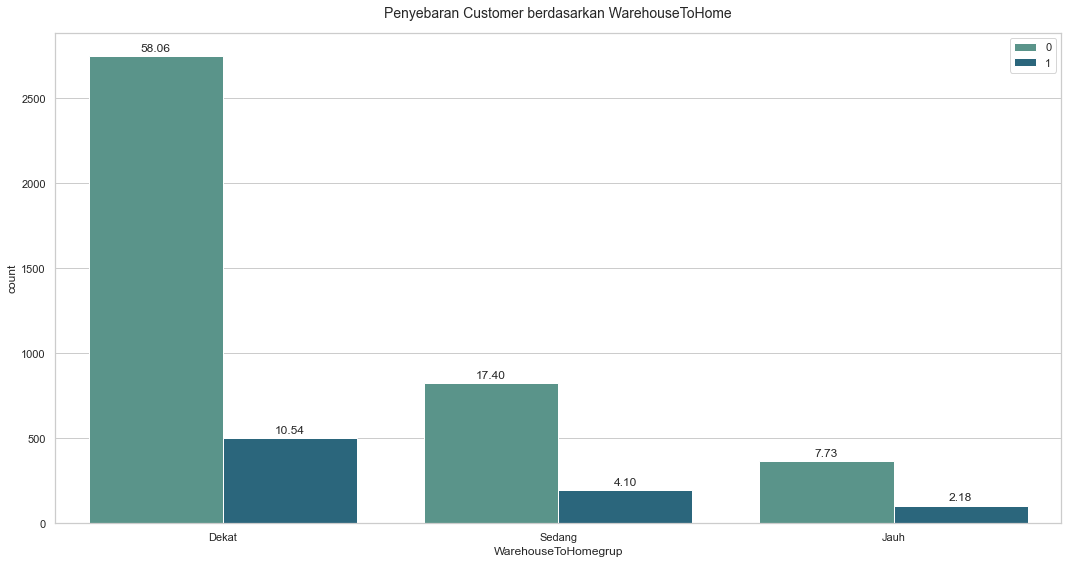


Persentase Kemungkinan Customer Churn:


,WarehouseToHomegrup,Churn
2,3,0.219616
1,2,0.190570
0,1,0.153633


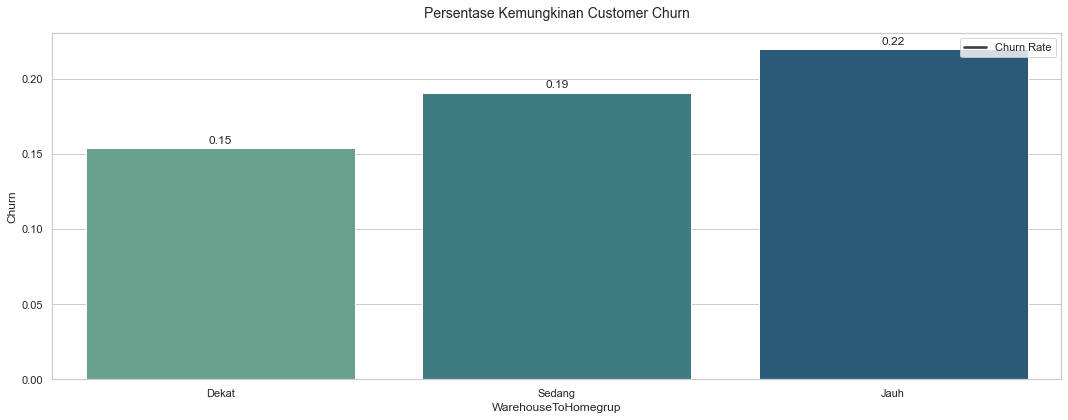

In [85]:
def WarehouseToHome(x):
    if x < 17:
        return 1
    elif (x >= 17) and (x <= 29):
        return 2
    else:
        return 3

df2['WarehouseToHomegrup'] = df2['WarehouseToHome'].apply(WarehouseToHome)
df2

print('Penyebaran Customer berdasarkan WarehouseToHome:')
display(pd.crosstab(df2['Churn'], df2['WarehouseToHomegrup']).sort_values(by='Churn', ascending=False))
print()

plt.figure(figsize=(15,8))
ax = sns.countplot(x='WarehouseToHomegrup', data=df2, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan WarehouseToHome', pad=15, fontsize=14)
plt.xticks(np.arange(3),('Dekat','Sedang','Jauh'), rotation='horizontal')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_WarehouseToHome = df2.pivot_table(values='Churn', index='WarehouseToHomegrup', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_WarehouseToHome)
print()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='WarehouseToHomegrup', y='Churn', data = df_WarehouseToHome, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(3),('Dekat','Sedang','Jauh'), rotation='horizontal')
plt.legend(['Churn Rate'], loc='upper right')
plt.show()

Penyebaran Customer berdasarkan WarehouseToHome:
- Customer yang paling banyak menggunakan e commerce adalah Customer yang paling dekat jarak rumah ke gudang (69%), disusul oleh jarak Sedang (22%) dan Jauh (10%). 
- Jarak Dekat yaitu rentang dimulai dari 5KM sampai 16KM. Jarak Sedang rentangnya dimulai dari 17KM sampai 29KM. Jarak Jauh rentangnya dimulai dari 30KM sampai 36KM.

Persentase Kemungkinan Customer Churn: 
- Customer yang jarak rumahnya jauh dari gudang memiliki tingkat churn tinggi (22%).


**Number Of Address**

Penyebaran Customer berdasarkan Number Of Address:


NumberOfAddressgrup,1,2,3
Churn,,,
1,479,231,86
0,2549,1034,356


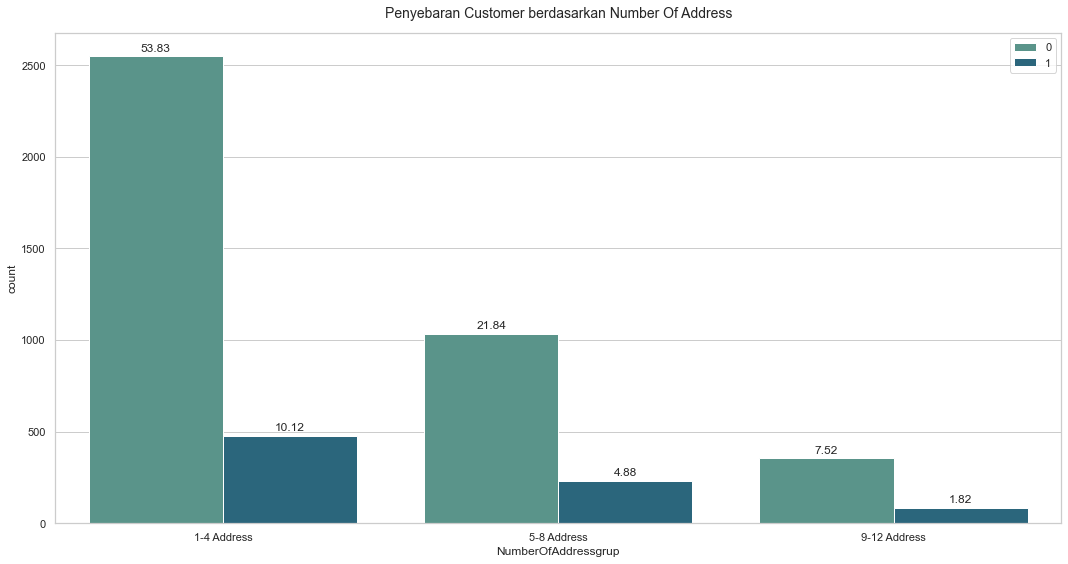


Persentase Kemungkinan Customer Churn:


,NumberOfAddressgrup,Churn
2,3,0.194570
1,2,0.182609
0,1,0.158190


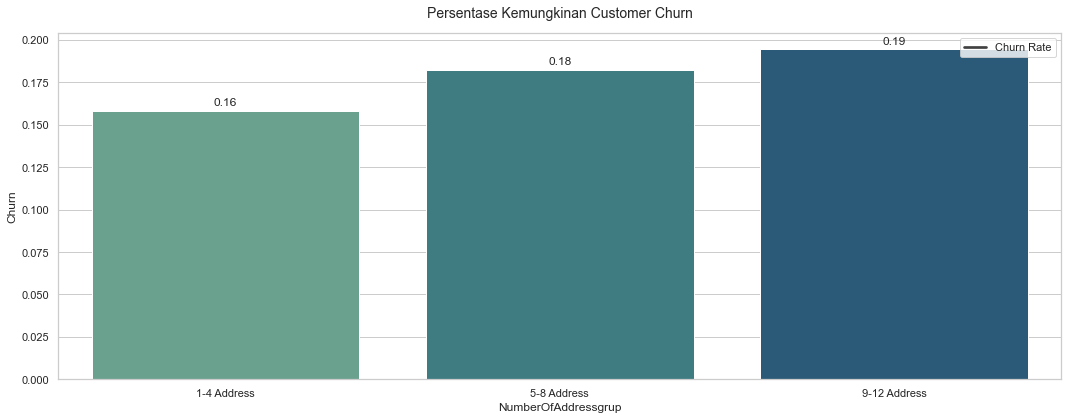

In [86]:
def NumberOfAddress(x):
    if x < 5:
        return 1
    elif (x >= 5) and (x <= 8):
        return 2
    else:
        return 3

df2['NumberOfAddressgrup'] = df2['NumberOfAddress'].apply(NumberOfAddress)
df2


print('Penyebaran Customer berdasarkan Number Of Address:')
display(pd.crosstab(df2['Churn'], df2['NumberOfAddressgrup']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(15,8))
ax = sns.countplot(x='NumberOfAddressgrup', data=df2, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df2.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Number Of Address', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(3),('1-4 Address','5-8 Address','9-12 Address'), rotation='horizontal')
plt.legend(loc='upper right')
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_NumberOfAddress = df2.pivot_table(values='Churn', index='NumberOfAddressgrup', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_NumberOfAddress)
print()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='NumberOfAddressgrup', y='Churn', data = df_NumberOfAddress, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(3),('1-4 Address','5-8 Address','9-12 Address'), rotation='horizontal')
plt.legend(['Churn Rate'], loc='upper right')
plt.show()

Penyebaran Customer Number Of Address:
- Customer yang menggunakan E-commerce lebih banyak memiliki 1 sampai 4 alamat (47%) dan yang lebih sedikit memiliki 9 sampai 12 alamat (9%).

Persentase Kemungkinan Customer Churn:
- Customer yang memiliki alamat 9 sampai 12 churnnya tinggi (20%) dan yang memiliki alamat 1 sampai 4 tingkat churnnya rendah (16%).


**Order Amount Hike From last Year**

Penyebaran Customer berdasarkan Order Amount Hike From last Year:


OrderAmountHikeFromlastYeargrup,1,2,3
Churn,,,
1,472,216,108
0,2318,1143,478


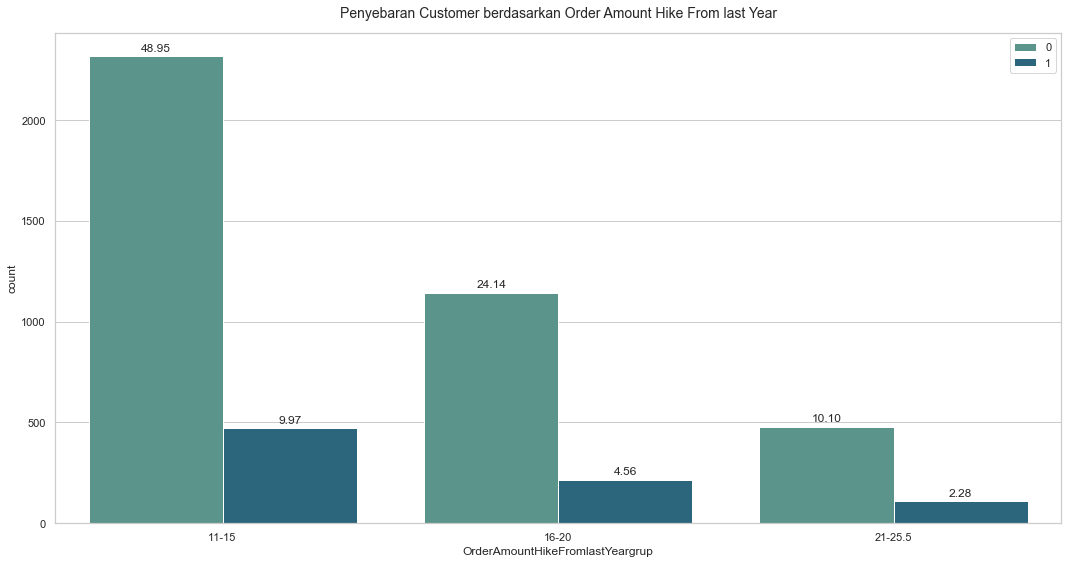


Persentase Kemungkinan Customer Churn:


,OrderAmountHikeFromlastYeargrup,Churn
2,3,0.184300
0,1,0.169176
1,2,0.158940


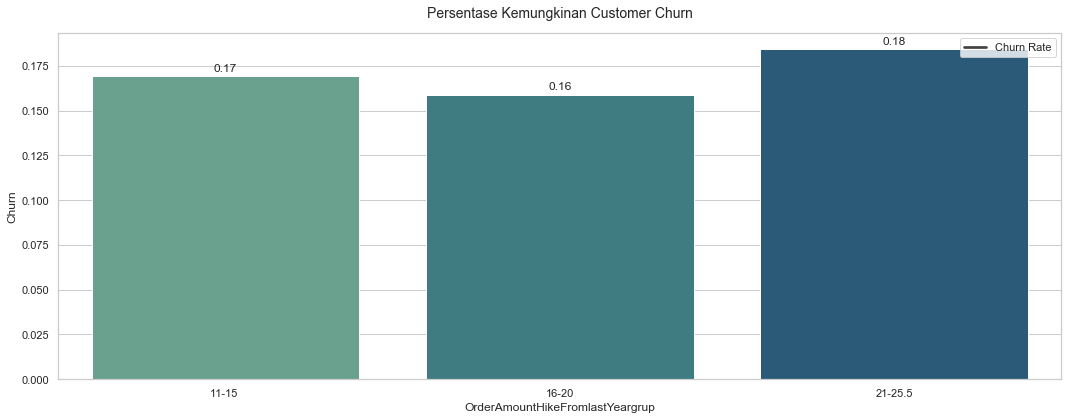

In [87]:
def OrderAmountHikeFromlastYear(x):
    if x < 16:
        return 1
    elif (x >= 16) and (x <= 20):
        return 2
    else:
        return 3

df2['OrderAmountHikeFromlastYeargrup'] = df2['OrderAmountHikeFromlastYear'].apply(OrderAmountHikeFromlastYear)
df2

print('Penyebaran Customer berdasarkan Order Amount Hike From last Year:')
display(pd.crosstab(df2['Churn'], df2['OrderAmountHikeFromlastYeargrup']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(15,8))
ax = sns.countplot(x='OrderAmountHikeFromlastYeargrup', data=df2, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df2.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Order Amount Hike From last Year', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(3),('11-15 ','16-20','21-25.5'), rotation='horizontal')
plt.legend(loc='upper right')
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_OrderAmountHikeFromlastYear = df2.pivot_table(values='Churn', index='OrderAmountHikeFromlastYeargrup', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_OrderAmountHikeFromlastYear)
print()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='OrderAmountHikeFromlastYeargrup', y='Churn', data = df_OrderAmountHikeFromlastYear, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(3),('11-15 ','16-20','21-25.5'), rotation='horizontal')
plt.legend(['Churn Rate'], loc='upper right')
plt.show()

Penyebaran Customer berdasarkan Order Amount Hike From last Year:
- Peningkatan pesanan terjadi pada kisaran 11 sampai 15 (60%) Customer.

Persentase Kemungkinan Customer Churn:
- Peningkatan Churn rate terjadi pada 21 sampai 25.5 (18%) Customer.

**Order Count**

Penyebaran Customer berdasarkan OrderCount:


OrderCountgrup,1,2,3,4
Churn,,,,
1,592,97,31,76
0,2817,509,310,303


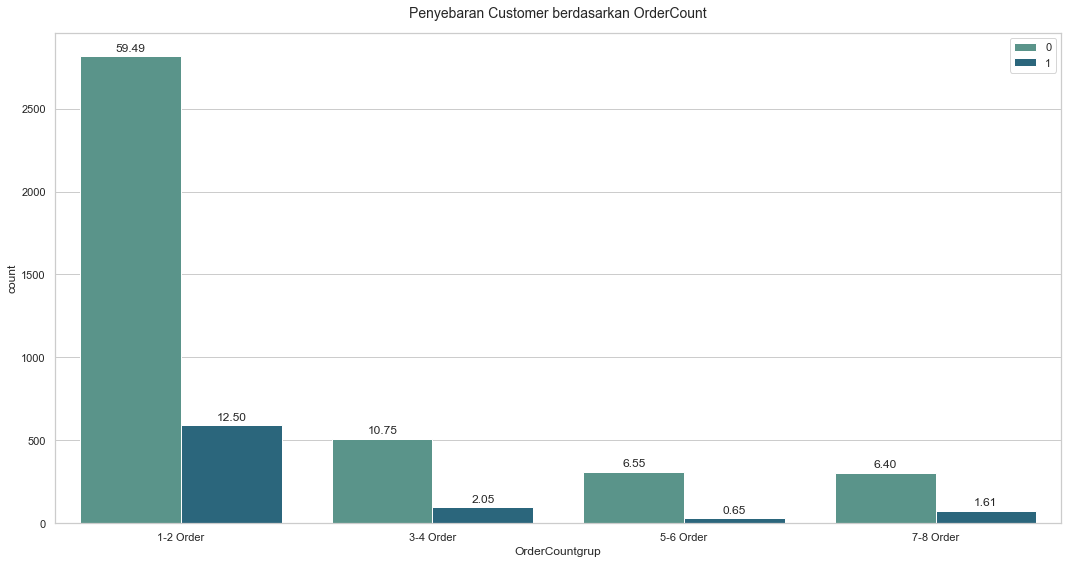


Persentase Kemungkinan Customer Churn:


,OrderCountgrup,Churn
3,4,0.200528
0,1,0.173658
1,2,0.160066
2,3,0.090909


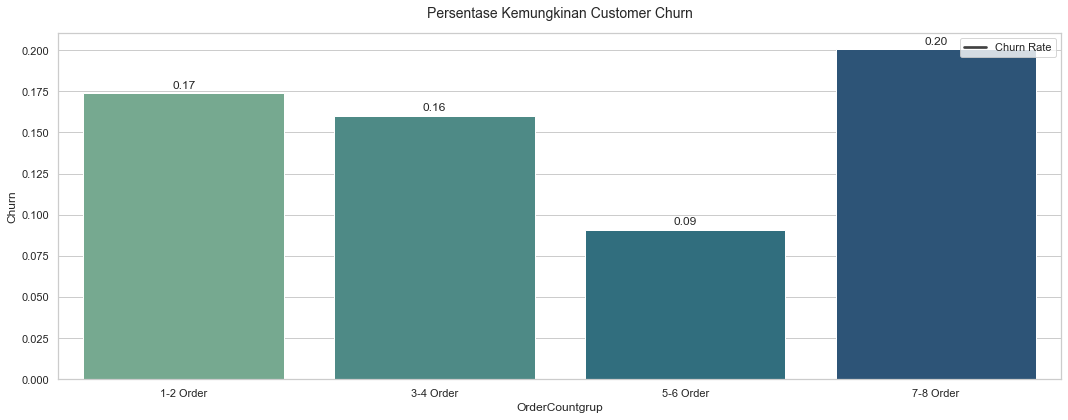

In [88]:
def OrderCount(x):
    if x < 3:
        return 1
    elif (x >= 3) & (x <= 4): 
        return 2
    elif (x >= 5) & (x <= 6): 
        return 3
    else:
        return 4

df2['OrderCountgrup'] = df2['OrderCount'].apply(OrderCount)
df2

print('Penyebaran Customer berdasarkan OrderCount:')
display(pd.crosstab(df2['Churn'], df2['OrderCountgrup']).sort_values(by='Churn', ascending=False))
print()

plt.figure(figsize=(15,8))
ax = sns.countplot(x='OrderCountgrup', data=df2, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df2.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan OrderCount', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(4),('1-2 Order','3-4 Order','5-6 Order','7-8 Order'), rotation='horizontal')
plt.legend( loc='upper right')
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_OrderCount = df2.pivot_table(values='Churn', index='OrderCountgrup', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_OrderCount)
print()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='OrderCountgrup', y='Churn', data = df_OrderCount, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(4),('1-2 Order','3-4 Order','5-6 Order','7-8 Order'), rotation='horizontal')
plt.legend(['Churn Rate'], loc='upper right')
plt.show()

Penyebaran Customer berdasarkan Order Count: 
- Total order 1 sampai 2 memiliki total customer paling banyak (75%) dan paling sedikit pada total order 5 sampai 6 (6%).


Persentase kemungkinan customer churn:
- Total order 7 sampai 8 tingkat churnnya tinggi (20%)dan Total order 5 sampai 6 tingkat churnnya rendah (10%).



**Day Since Last Order**

Penyebaran Customer berdasarkan DaySinceLastOrder:


DaySinceLastOrder,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,14.5
Churn,,,,,,,,,,,,,,,,
1,142,154,112,128,60,33,16,65,52,19,8,4,2,0,1,0
0,282,376,612,761,393,184,92,344,401,197,99,55,52,39,23,29


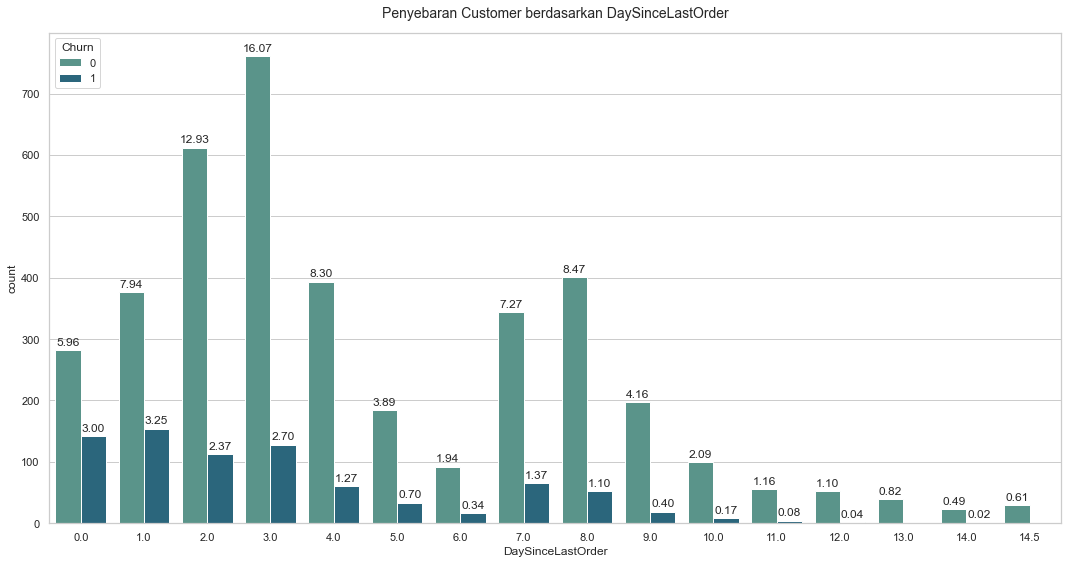


Persentase Kemungkinan Customer Churn:


,DaySinceLastOrder,Churn
0,0.0,0.334906
1,1.0,0.290566
7,7.0,0.158924
2,2.0,0.154696
5,5.0,0.152074
6,6.0,0.148148
3,3.0,0.143982
4,4.0,0.132450
8,8.0,0.114790
9,9.0,0.087963


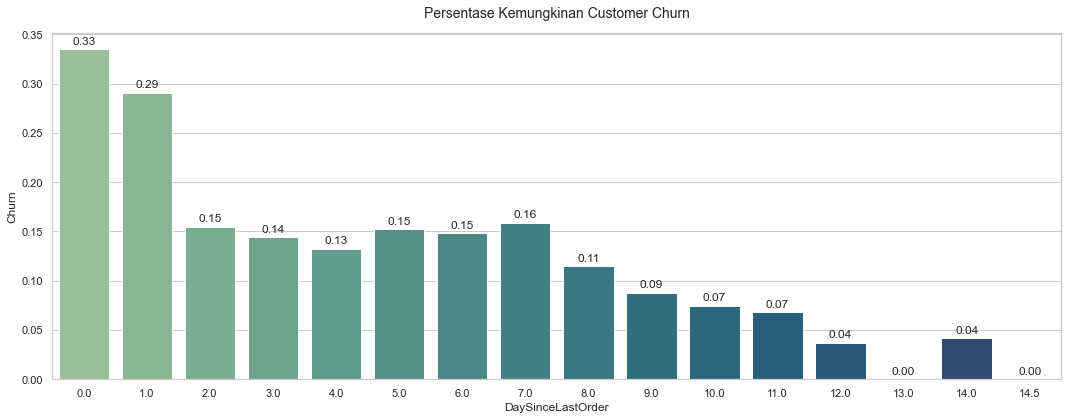

In [89]:
print('Penyebaran Customer berdasarkan DaySinceLastOrder:')
display(pd.crosstab(df['Churn'], df['DaySinceLastOrder']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(15,8))
ax = sns.countplot(x='DaySinceLastOrder', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df2.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan DaySinceLastOrder', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_DaySinceLastOrder = df.pivot_table(values='Churn', index='DaySinceLastOrder', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_DaySinceLastOrder)
print()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='DaySinceLastOrder', y='Churn', data = df_DaySinceLastOrder, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Penyebaran Customer berdasarkan DaySinceLastOrder:
- Persentase Customer paling banyak adalah di 3 hari terakhir belanja (22%).

Persentase Kemungkinan Customer Churn:
- Tingkat Customer churn tinggi pada 0 hari (33%) dan 1 hari (29%).

**Cashback Amount**

Penyebaran Customer berdasarkan CashbackAmount:


CashbackAmountgrup,1,2,3,4,5
Churn,,,,,
1,191,433,142,17,13
0,474,2111,729,329,296


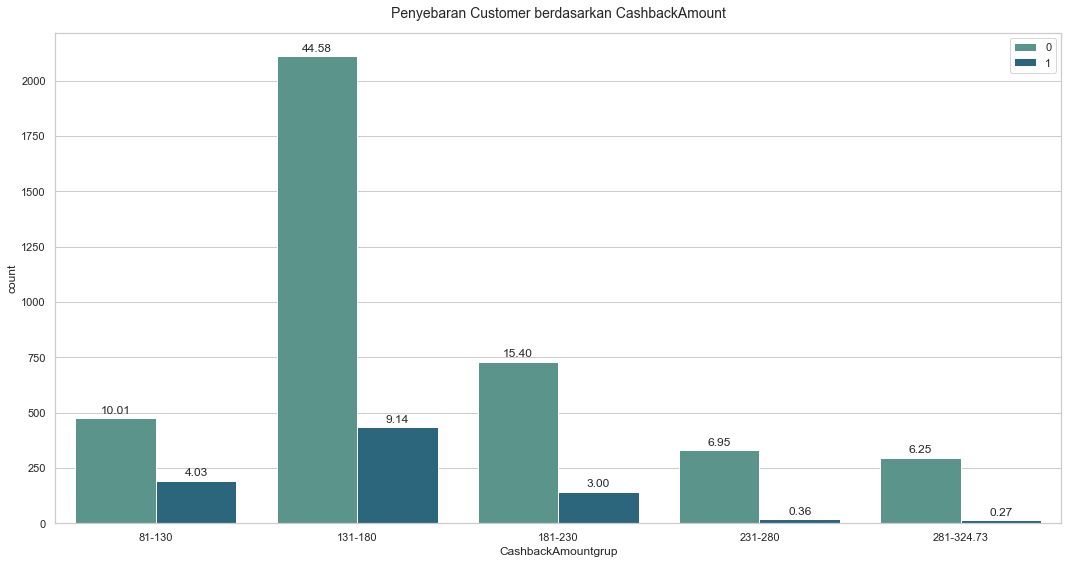


Persentase Kemungkinan Customer Churn:


,CashbackAmountgrup,Churn
0,1,0.287218
1,2,0.170204
2,3,0.163031
3,4,0.049133
4,5,0.042071


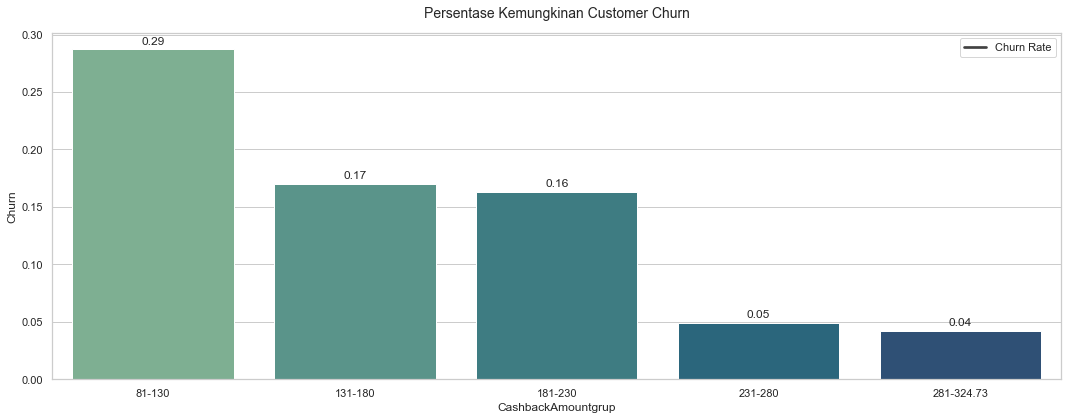

In [90]:
def CashbackAmount(x):
    if x <= 130:
        return 1
    elif (x >= 131 ) and (x <= 180):
        return 2
    elif (x >= 181 ) and (x <= 230):
        return 3
    elif (x >= 231 ) and (x <= 280):
        return 4
    else:
        return 5

df2['CashbackAmountgrup'] = df2['CashbackAmount'].apply(CashbackAmount)
df2

print('Penyebaran Customer berdasarkan CashbackAmount:')
display(pd.crosstab(df2['Churn'], df2['CashbackAmountgrup']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(15,8))
ax = sns.countplot(x='CashbackAmountgrup', data=df2, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df2.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan CashbackAmount', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(5),('81-130','131-180','181-230','231-280','281-324.73'), rotation='horizontal')
plt.legend( loc='upper right')
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_OrderAmountHikeFromlastYear = df2.pivot_table(values='Churn', index='CashbackAmountgrup', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_OrderAmountHikeFromlastYear)
print()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='CashbackAmountgrup', y='Churn', data = df_OrderAmountHikeFromlastYear, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.xticks(np.arange(5),('81-130','131-180','181-230','231-280','281-324.73'), rotation='horizontal')
plt.legend(['Churn Rate'], loc='upper right')
plt.show()

Penyebaran Customer berdasarkan CashbackAmount:
- Rata-rata cashback yang didapatkan Customer paling tinggi pada rentang 131 sampai 180 (54%) dan yang paling rendah pada rentang 281 sampai 324.73 (7%).


Persentase Kemungkinan Customer Churn:
- Customer yang Churn ratenya tinggi yaitu Customer yang mendapatkan cashback pada rentang 81 sampai 130 (29%) dan Churn ratenya rendah pada rentang 281 sampai 324.73 (4%).

**Correlation**

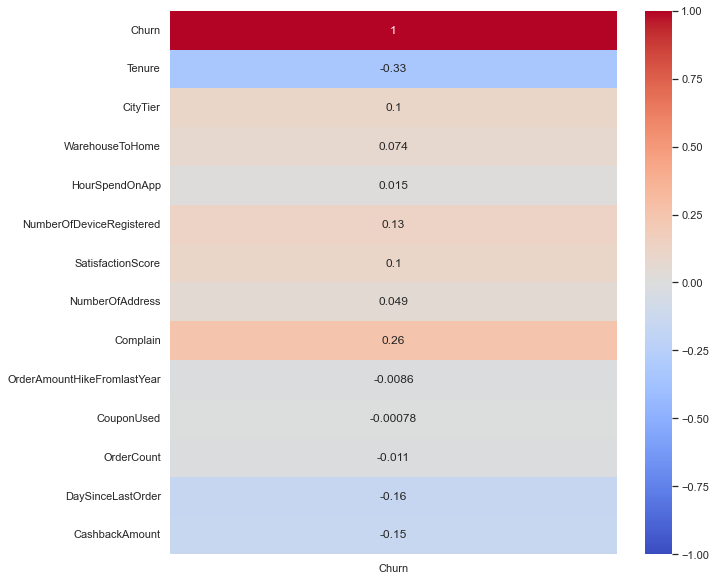

In [91]:
# menampilkan koefisien korelasi dalam bentuk heatmap
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(df.corr()['Churn']), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

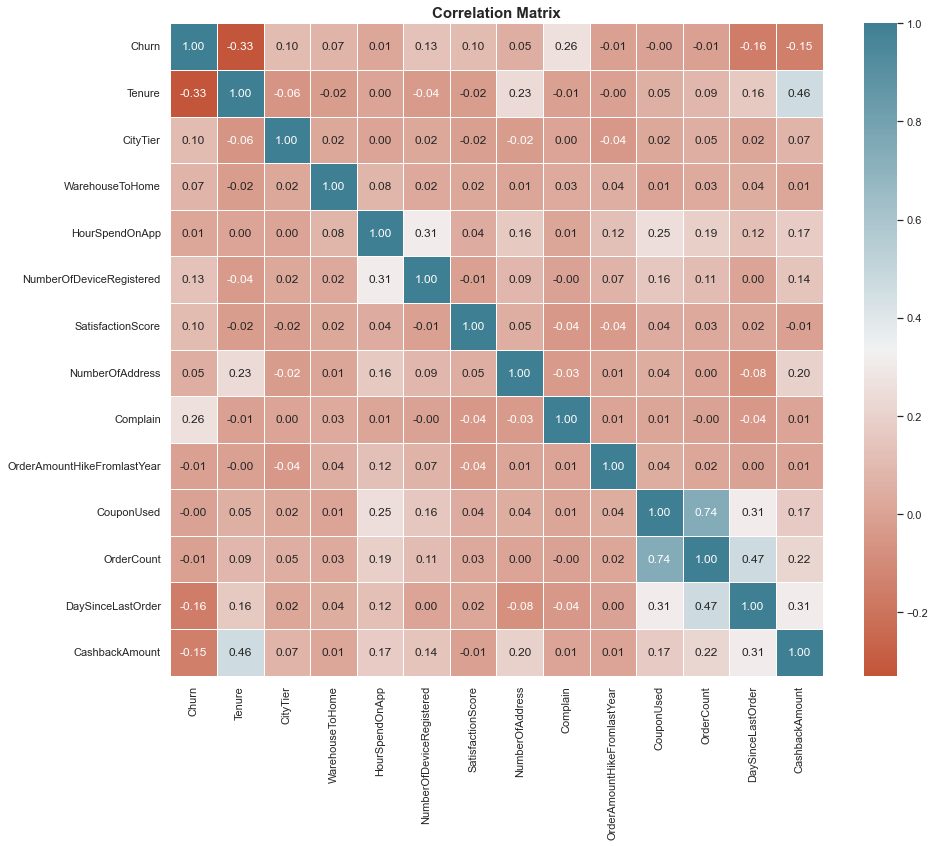

In [92]:
# Correlation matrix
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

- Terdapat korelasi kuat antara Feature CouponUsed dan OrderCount, karena setiap Customer dengan lebih banyak kupon dapat memesan lebih banyak barang.
- Terdapat korelasi kuat antara Feature Tenure dan CashbackAmount juga karena semakin lama pelanggan menggunakan layanan semakin banyak juga cashback yang didapatkan. 

### **EDA Categorical Feature**

In [93]:
df.describe(include='object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,4735,4735,4735,4735,4735
unique,2,5,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,3391,1956,2856,1775,2480


**Preferred Login Device**

Penyebaran Customer berdasarkan Login Device:


PreferredLoginDevice,Computer,Mobile Phone
Churn,,
1,270,526
0,1074,2865


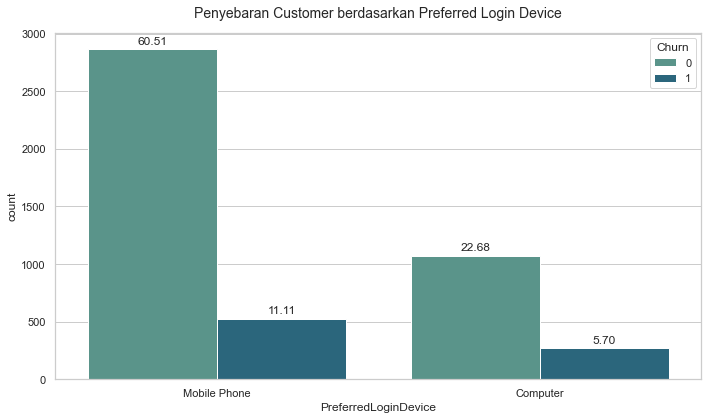


Persentase Kemungkinan Customer Churn:


,PreferredLoginDevice,Churn
0,Computer,0.200893
1,Mobile Phone,0.155116


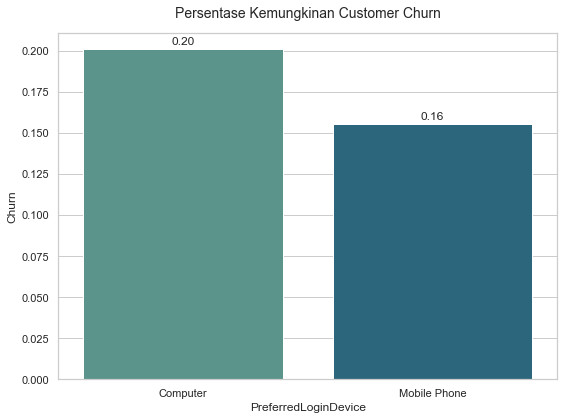

In [94]:
print('Penyebaran Customer berdasarkan Login Device:')
display(pd.crosstab(df['Churn'], df['PreferredLoginDevice']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='PreferredLoginDevice', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Preferred Login Device', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_logindevice = df.pivot_table(values='Churn', index='PreferredLoginDevice', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_logindevice)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='PreferredLoginDevice', y='Churn', data = df_logindevice, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Penyebaran Customer berdasarkan Preferred Login Device:
- Customer E Commerce paling banyak mengakses layanan menggunakan Mobile Phone (71%) dan sisanya menggunakan Computer (29%).

Persentase Kemungkinan Customer Churn:
- Customer yang menggunakan Computer memiliki tingkat churn yang lebih tinggi (20%) dan kategori lain yaitu Mobile Phone (16%).



**Preferred Payment Mode**

Penyebaran Customer berdasarkan Metode Pembayaran:


PreferredPaymentMode,Cash on Delivery,Credit Card,Debit Card,E wallet,UPI
Churn,,,,,
1,110,214,288,128,56
0,310,1264,1668,403,294


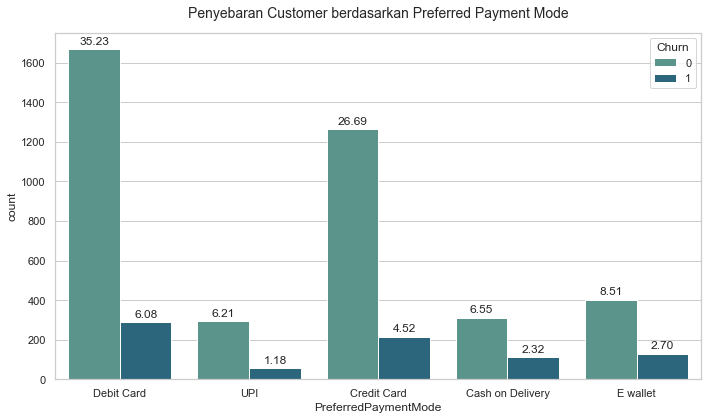


Persentase Kemungkinan Customer Churn:


,PreferredPaymentMode,Churn
0,Cash on Delivery,0.261905
3,E wallet,0.241055
4,UPI,0.160000
2,Debit Card,0.147239
1,Credit Card,0.144790


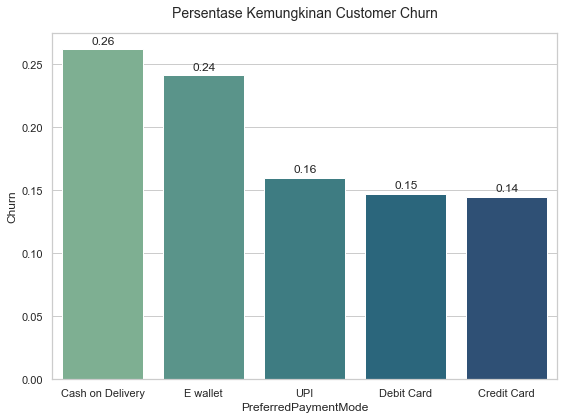

In [95]:
print('Penyebaran Customer berdasarkan Metode Pembayaran:')
display(pd.crosstab(df['Churn'], df['PreferredPaymentMode']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='PreferredPaymentMode', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Preferred Payment Mode', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_payment = df.pivot_table(values='Churn', index='PreferredPaymentMode', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_payment)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='PreferredPaymentMode', y='Churn', data = df_payment, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Pada Grafik Penyebaran Customer berdasarkan Preferred Payment Mode:
- Customer yang melakukan pembayaran di E commerce lebih banyak menggunakan Debit Card (41%) dan paling sedikit yaitu UPI (7%) dan Cash on Delivery (9%).

Pada grafik Persentase Kemungkinan Customer Churn:
- Pelanggan yang memilih menggunakan Cash on Delivery tingkat Churnnya lebih tinggi (26%) dan tingkat churn rendah penggunaan Credit Card (14%).

In [96]:
df4=df2[(df2['PreferredPaymentMode']=='Credit Card') & (df['Churn']==1)][['Churn','Tenuregrup','CashbackAmountgrup']]

print(round(df4.value_counts()/df4.shape[0]*100))


Churn  Tenuregrup  CashbackAmountgrup
1      1           2                     52.0
                   1                     15.0
       2           1                      7.0
                   3                      7.0
       1           3                      6.0
       2           2                      3.0
       3           2                      3.0
       1           4                      2.0
       4           2                      2.0
                   3                      2.0
                   5                      2.0
dtype: float64


Kenapa Customer yang menggunakan Credit Card masih ada yang churn?

Ternyata setelah melihat feature lain, bahwa Customer yang menggunakan Credit Card merupakan Customer yang baru menggunakan layanan dalam 1 sampai 2 bulan. Berdasarkan Cashback Amount bahwa Customer tersebut mendapatkan cashback dari rentang 131-180.

**Gender**

Penyebaran Customer berdasarkan Gender:


Gender,Female,Male
Churn,,
1,293,503
0,1586,2353


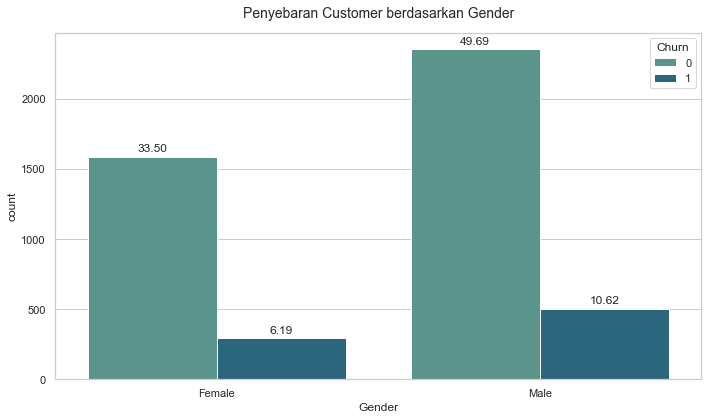


Persentase Kemungkinan Customer Churn:


,Gender,Churn
1,Male,0.176120
0,Female,0.155934


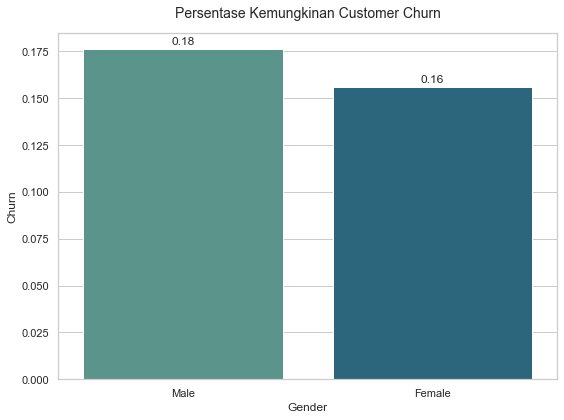

In [97]:
print('Penyebaran Customer berdasarkan Gender:')
display(pd.crosstab(df['Churn'], df['Gender']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Gender', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_Gender = df.pivot_table(values='Churn', index='Gender', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_Gender)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='Gender', y='Churn', data = df_Gender, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Berdasarkan grafik Penyebaran Customer kategori Gender:
- Mayoritas yang menggunakan E Commerce gender Male lebih tinggi sebesar (60%), dimana nilai persentase gender Female sebesar (40%). 

Berdasarkan grafik Persentase Kemungkinan Customer Churn:
- Persentase customer churn yang lebih besar itu Gender Male sebesar (18%) dan persentase customer churn gender female sebesar(16%).

**Prefered Order Category**

Penyebaran Customer berdasarkan Prefered Order Category:


PreferedOrderCat,Fashion,Grocery,Laptop & Accessory,Mobile,Mobile Phone,Others
Churn,,,,,,
1,110,7,190,184,294,11
0,557,281,1585,531,819,166


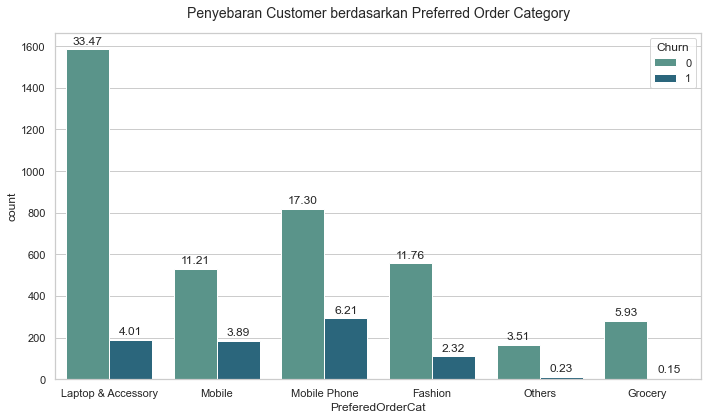


Persentase Kemungkinan Customer Churn:


,PreferedOrderCat,Churn
4,Mobile Phone,0.264151
3,Mobile,0.257343
0,Fashion,0.164918
2,Laptop & Accessory,0.107042
5,Others,0.062147
1,Grocery,0.024306


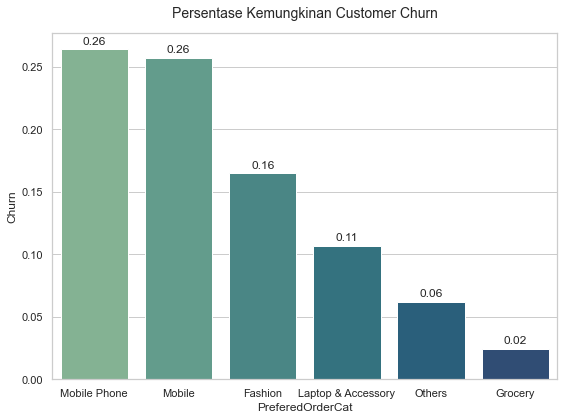

In [98]:
print('Penyebaran Customer berdasarkan Prefered Order Category:')
display(pd.crosstab(df['Churn'], df['PreferedOrderCat']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='PreferedOrderCat', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Preferred Order Category', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_ordercat = df.pivot_table(values='Churn', index='PreferedOrderCat', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_ordercat)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='PreferedOrderCat', y='Churn', data = df_ordercat, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Penyebaran Customer Preferred Order kategori:
- Kategori order yang customer paling banyak minati adalah kategori elektronik (76%), disusul oleh fashion (14%), grocery (6%) dan others (4%).
- Kategori Elektronik merupakan Mobile Phone, Mobile, Laptop&Accessory. 

Persentase Kemungkinan Customer Churn:
- Customer yang sering membeli kategori elektronik paling tinggi churn (63%) dan paling rendah Grocery (3%).

**Marital Status**

Penyebaran Customer berdasarkan Marital Status:


MaritalStatus,Divorced,Married,Single
Churn,,,
1,115,284,397
0,673,2196,1070


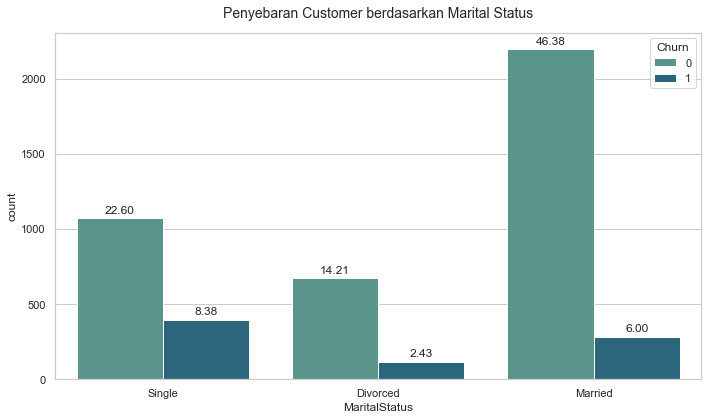


Persentase Kemungkinan Customer Churn:


,MaritalStatus,Churn
2,Single,0.270620
0,Divorced,0.145939
1,Married,0.114516


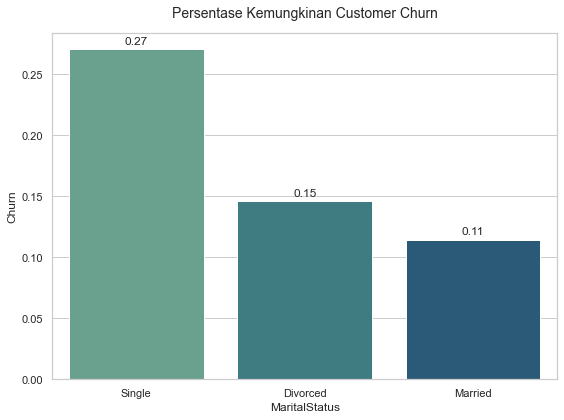

In [99]:
print('Penyebaran Customer berdasarkan Marital Status:')
display(pd.crosstab(df['Churn'], df['MaritalStatus']).sort_values('Churn', ascending=False))
print()

plt.figure(figsize=(10,6))
ax = sns.countplot(x='MaritalStatus', data=df, hue='Churn', palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()/df.shape[0])*100, '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Penyebaran Customer berdasarkan Marital Status', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

print()
print('Persentase Kemungkinan Customer Churn:')
df_MaritalStatus = df.pivot_table(values='Churn', index='MaritalStatus', aggfunc='mean').reset_index().sort_values(by='Churn', ascending=False)
display(df_MaritalStatus)
print()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='MaritalStatus', y='Churn', data = df_MaritalStatus, palette = 'crest')
for a in ax.patches:
    ax.annotate(format((a.get_height()), '.2f'), (a.get_x() + a.get_width()/2., a.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
    
plt.title('Persentase Kemungkinan Customer Churn', pad=15, fontsize=14)
plt.tight_layout()
plt.show()

Penyebaran Customer kategori Marital Status:
- Persentase customer yang lebih banyak menggunakan E commerce  yaitu customer married (52%). Lalu disusul oleh customer single (31%) dan customer yang lebih sedikit menggunakan E-commerce yaitu customer divorced (17%).

Persentase Kemungkinan Customer Churn:
- Customer yang single lebih tinggi tingkat Churnnya (27%) dan customer yang rendah tingkat churnnya yaitu married (12%).

### **Analysis insight**
1. Customer yang menggunakan computer lebih sedikit dan tingkat churnnya tinggi.

2. Penggunaan layanan pembayaran berupa Cash on Delivery memiliki tingkat churn yang tinggi.

3. Customer yang membeli kategori elektronik pada layanan e commerce paling tinggi churnnya (63%).

4. Customer yang berada di City tier 3 memiliki churn ratenya tinggi. Semakin tinggi City Tiernya semakin tinggi tingkat churnnya karena banyak faktor yang memperngaruhinya.

5. Pada Feature Satisfaction Score, Customer yang memberikan Score 5 tidak bisa dikatakan Customer yang tidak akan Churn.

6. Customer yang melakukan complain churn ratenya tinggi.

7. Customer yang menggunakan kupon 8 kali tidak bisa dikatakan Customer yang tidak akan churn, karena banyak Customer yang hanya ingin menggunakan promo saja.

8. Pada Feature Tenure, Mayoritas Customer memiliki umur tenure yang pendek. Customer yang sudah lama menggunakan layanan maka cenderung untuk tidak churn.

9. Customer yang memiliki jarak rumah yang jauh ke gudang pengiriman akan tinggi churn ratenya.

10. Berdasarkan feature DaySinceLastOrder, Customer yang memiliki churn rate tinggi akan berkurang dengan bertambah lamanya hari terakhir Customer berbelanja. Semakin sedikit jumlah Customer semakin lama customer tidak berbelanja.

11. Customer yang memiliki churn rate tinggi akan berkurang dengan bertambah tinggi Cashback yang diterima Customer.

12. Berdasarkan Matrix Korelasi, Feature CouponUsed dan OrderCount memiliki korelasi yang kuat karena setiap Customer dengan lebih banyak kupon dapat memesan lebih banyak barang. Dan terdapat korelasi kuat antara Feature Tenure dan CashbackAmount karena semakin lama customer menggunakan layanan semakin banyak juga cashback yang didapatkan.

## **Modeling & Evaluation**

In [100]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler

In [101]:
df.describe(include='object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,4735,4735,4735,4735,4735
unique,2,5,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,3391,1956,2856,1775,2480


### **Encoding**

- Kita akan mengubah data kategorikal ke numerikal atau encoding. Seluruh kategorikal antara lain:
<br>

| Categorical Feature | Unique |
| --- | --- |
| `PreferredLoginDevice` | 2 |
| `PreferredPaymentMode` | 5 |
| `Gender` | 2 |
| `PreferredOrderCar` | 6 |
| `MaritalStatus` | 3 |


- Oleh karena itu fitur kategorikal memiliki unique value kurang dari 6, kita dapat menggunakan OneHotEncoder dalam melakukan enconding fitur kategorikal.

**One Hot Encoding**
- Kita menggunakan teknik kategorikal data encoding ini ketika fitur adalah nominal data atau tidak terdapat urutan.
- Data yang dihasilkan dari encoder ini ada 0 dan 1. 0 mewakili tidak ada nya data pada kolom. Sedangkan, angka 1 mewakili adanya data pada kolom
- Selain data kategorikal, maka kita menggunakan `remainder = 'passthrough'` agar tetap ada fitur-fitur numerikal dalam membangun modeling.

In [102]:
# Mengubah fitur kategorikal ke numerikal
transformer = ColumnTransformer([
    ('OneHot', OneHotEncoder(), ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']),
], remainder='passthrough')

**Define Target(X) and Feature(y)**

- Sebelum kita membangun model, langkah awal adalah menentukan target sebagai variabel X dan feature sebagai variabel y

In [103]:
# Define X and y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [104]:
X.columns

Index(['Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

- Fitur-fitur kategorikal yang telah di encoding, setiap unique value-nya akan menjadi kolom baru dengan value angka 1 jika terdapat dalam baris dan 0 jika tidak terdapat dalam baris.

In [105]:
y.name

'Churn'

**Data Splitting**

- Selanjutnya, data akan kita split menjadi data training dan data testing. Perbandinganya harus lebih kecil data testing, untuk kasus kali ini kita akan membagi data dengan proporsi `80:20`. `80%` untuk `data training`, dan sisanya `20%` untuk `data testing`. Data akan dibagi secara acak(random) dengan random_state = 10.
- Karena target kita merupakan kategorikal, maka kita akan membangun `model klasifikasi`. Kita akan memilih beberapa algoritma klasifikasi untuk membangun model yang cocok.
- Pada train_test_split, kita akan melibatkan stratify pada target karena klasifikasi model.

In [106]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 10)

# Scaling data
scaler = RobustScaler()

### **Model Selection**

- Setelah melakukan split pada data, langkah berikutnya kita akan menentukan algoritma yang akan kita bangun sebagai model klasifikasi untuk kasus ini.
- Kita akan memilih algoritma dengan rata-rata metrics(f1_score)-nya paling tinggi dengan standar deviasi juga kecil yang menandakan model lebih stabil.
- Pemilihan algoritma menggunakan cross validation dengan 10 kali validasi, sehingga akan menemukan rata-rata nilai f1_score dari 10 kali validasi tersebut.
- Kita menggunakan metric `f1_score` karena model dibangun untuk fokus pada False Positive (FP) dan False Negative (FN).

In [107]:
# Define algoritma classification

logreg = LogisticRegression(random_state=10)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=10)
rf = RandomForestClassifier(random_state=10)
adb = AdaBoostClassifier(random_state=10)
xgb = XGBClassifier(random_state=10, eval_metric='mlogloss')

In [108]:
# Kandidat algoritma
models = [logreg, knn, dt, rf, adb, xgb]

score_f1 = []
nilai_mean_f1 = []
nilai_std_f1 = []

# Mencari algoritma terbaik berdasarkan mean nilai f1_score
for i in models:
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv = StratifiedKFold(n_splits=10),
        scoring='f1',
        error_score='raise'
    )

    score_f1.append(model_cv)
    nilai_mean_f1.append(model_cv.mean())
    nilai_std_f1.append(model_cv.std())

    print(i)
    print(score_f1)
    print()

LogisticRegression(random_state=10)
[array([0.72897196, 0.67889908, 0.57142857, 0.52      , 0.61818182,
       0.63551402, 0.63157895, 0.63265306, 0.61403509, 0.59813084])]

KNeighborsClassifier()
[array([0.72897196, 0.67889908, 0.57142857, 0.52      , 0.61818182,
       0.63551402, 0.63157895, 0.63265306, 0.61403509, 0.59813084]), array([0.54166667, 0.46315789, 0.57142857, 0.47727273, 0.57407407,
       0.4375    , 0.46938776, 0.58252427, 0.55319149, 0.56      ])]

DecisionTreeClassifier(random_state=10)
[array([0.72897196, 0.67889908, 0.57142857, 0.52      , 0.61818182,
       0.63551402, 0.63157895, 0.63265306, 0.61403509, 0.59813084]), array([0.54166667, 0.46315789, 0.57142857, 0.47727273, 0.57407407,
       0.4375    , 0.46938776, 0.58252427, 0.55319149, 0.56      ]), array([0.85271318, 0.83333333, 0.765625  , 0.79069767, 0.81818182,
       0.80952381, 0.78195489, 0.87301587, 0.7826087 , 0.85714286])]

RandomForestClassifier(random_state=10)
[array([0.72897196, 0.67889908, 0.57142

In [109]:
# Evaluasi hasil dari 6 kandidat algoritma
recap = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'f1-score Mean': nilai_mean_f1,
    'f1-score Std': nilai_std_f1
}).set_index('Model').sort_values(by='f1-score Mean', ascending = False)

recap

,f1-score Mean,f1-score Std
Model,,
XGBoost,0.873153,0.040097
Random Forest,0.833415,0.038348
Decision Tree,0.816480,0.034768
AdaBoost,0.657921,0.066406
Logistic Regression,0.622939,0.053543
KNN,0.523020,0.051945


- Dari hasil cross validation, kita dapat melihat pada DataFrame di atas, bahwa model `XGBoost` memiliki nilai `Mean f1-score` paling tinggi `(0.873153)` dan nilai `Std (0.040097)` paling stabil.
- Oleh Karena itu, untuk kasus ini kita akan menmbangun model `XGBClassifier`.

**XGBClassifier**

- XGboost adalah implementasi lanjutan dari algoritma peningkatan gradien (Gradient Boosting). XGboost menggunakan prinsip ensemble yaitu menggabungkan beberapa set pembelajar (tree) yang lemah menjadi sebuah model yang kuat sehingga menghasilkan prediksi yang kuat.
https://www.datacamp.com/tutorial/xgboost-in-python

**Method Resampling**

- Kelas imbalance merupakan masalah problem dalam binary predictive modeling, yang di mana distribusi antara dua kelas sangat miring, biasanya kelas negatif melebihi jumlah kelas positif.
- Dataset ini merupakan data imbalance atau dapat dilihat kelas majority (Churn = 0) sebesar 83% dan kelas minority (Churn = 1) sebesar 17%. Data imbalance dapat menghasilkan performa akhir model akan bias.
- Maka kita harus melakukan handling terhadap data imbalance. Ketika melakukan model selection, penyeimbangan data hanya dilakukan pada dataset training saja. Data testing dan validasi data tidak boleh terlibat dalam penyeimbangan data. Jika kita melibatkan data test dan data validasi dalam penyeimbangan data, maka performa model yang dihasilkan nantinya akan bias.
- Ketika melakukan performa terakhir model pada test set, kita melakukan penyeimbangan data pada training set dan validation set, untuk test set tetap dibiarkan saja.
- Terdapat beberapa cara dalam melakukan handling imbalance, untuk kali ini kita akan menggunakan percobaan dengan randomundersampling dan smote.
- Jika nanti melakukan handling data imbalance menghasilkan nilai f1_score lebih rendah daripada sebelum dihandling imbalance, maka kita tidak akan melanjutkan proses handling tersebut.
- Jika terjadi hal tersebut, metrics yang kita gunakan yaitu f1_score dan PR AUC score sudah sesuai digunakan untuk data imbalance.

**Test RandomUnderSampling**

- Proses metode RandomUnderSampler akan mengambil secara acak dari kelas majority dengan pengambilan data sama dengan jumlah data kelas minority hingga distribusi kelas dapat seimbang.

In [110]:
# Resampling Random Under Sampler
rus = RandomUnderSampler()

model = xgb
score_f1 = []
nilai_mean_f1 = []
nilai_std_f1 = []

estimator = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('resampler', rus),
    ('model', model)
    ])

model_cv = cross_val_score(
    estimator,
    X_train,
    y_train,
    cv = StratifiedKFold(n_splits=10),
    scoring='f1',
    error_score='raise'
    )

nilai_mean_f1 = model_cv.mean()
nilai_std_f1 = model_cv.std()

print('XGBClassifier(RandomUnderSampler): ')
print(f'Nilai Mean f1-Score: {nilai_mean_f1}')
print(f'Nilai Std f1-Score: {nilai_std_f1}')

XGBClassifier(RandomUnderSampler): 
Nilai Mean f1-Score: 0.7574411060002599
Nilai Std f1-Score: 0.03375415556311187


- Terlihat dari percobaan menggunakan RandomUnderSampler, kita mendapatkan nilai f1_score lebih kecil daripada No treatment.
    1. No Treatment = 0.873153
    2. RandomUnderSampler = 0.75184
- Oleh karena itu, kita dapat mencoba handling imbalance yang lainnya.

**Smote**

- Proses metode smote ini membuat data baru yang mirip dengan data kelas minoritas. Kita terus menambah data pada kelas minoritas hingga distribusinya lebih berimbang.

In [111]:
# Resampling Smote
smote = SMOTE(random_state = 10)

model = xgb
estimator = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('resampler', smote),
    ('model', model)
    ])

model_cv = cross_val_score(
    estimator,
    X_train,
    y_train,
    cv = StratifiedKFold(n_splits=10),
    scoring='f1',
    error_score='raise'
    )

nilai_mean_f1 = model_cv.mean()
nilai_std_f1 = model_cv.std()

print('XGBClassifier(Smote):')
print(f'Nilai Mean f1-Score: {nilai_mean_f1}')
print(f'Nilai Std f1-Score: {nilai_std_f1}')


XGBClassifier(Smote):
Nilai Mean f1-Score: 0.8731938842659812
Nilai Std f1-Score: 0.039057247616566884


- Dengan menggunakan metode SMOTE(oversampling), rata-rata nilai f1-score menurun sedikit daripada No treatment.
    1. No Treatment = 0.873153
    2. RandomUnderSampler = 0.75184
    3. Smote = 0.873193
- Karena hasil f1_score menggunakan smote tidak signifikan perbedaannya dengan No treatment, maka kita tidak akan menggunakan metode smote pada kasus ini.

### Hyperparameter Tuning XGboost

In [112]:
# Kedalaman pohon
max_depth = list(np.arange(8,11))

# Learning rate
learning_rate = list(np.arange(0.4, 1))

# Jumlah pohon
n_estimators = list(np.arange(150, 210))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.7, 1))

# Gamma (min_impurity_decrease)
gamma = list(np.arange(0,5)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0.5, 1))

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGBoost
hyperparam_space_xgb = {'model__eta': list(np.arange(0.1, 0.3)),
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__min_child_weight': list(np.arange(0.3, 0.6))
}

In [113]:
# Model XGBoost dengan hyperparameter tuning
xgb = XGBClassifier(random_state = 10)

# Membuat algorithm chains
estimator_xgb = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', model)
])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator = estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = StratifiedKFold(n_splits=10),
    scoring = 'f1',
    n_jobs = -1,
    random_state = 10
)

# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(),
                                                                               ['PreferredLoginDevice',
                                                                                'PreferredPaymentMode',
                                                                                'Gender',
                                                                                'PreferedOrderCat',
                                                                                'MaritalStatus'])])),
                                             ('scaler', RobustScaler()),
       

In [114]:
# Melihat hasil tuning dalam bentuk dataframe
cv_result_xgb = pd.DataFrame(random_xgb.cv_results_)
cv_result_xgb[['rank_test_score','mean_test_score','std_test_score']].sort_values(by=['rank_test_score']).head()

,rank_test_score,mean_test_score,std_test_score
5,1,0.875635,0.036180
26,2,0.874120,0.030803
36,3,0.872988,0.029245
48,4,0.872384,0.030043
19,5,0.871033,0.034353


In [115]:
# Cek skor dan params terbaik
print('XGBoost Classifier')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost Classifier
Best_score: 0.8756353376991683
Best_params: {'model__subsample': 0.7, 'model__reg_alpha': 0.001, 'model__n_estimators': 182, 'model__min_child_weight': 0.3, 'model__max_depth': 10, 'model__learning_rate': 0.4, 'model__gamma': 0, 'model__eta': 0.1, 'model__colsample_bytree': 0.5}


### Model Performance in Test Set

**Before Hyperparameter Tuning**

In [116]:
# Model Terbaik
model = XGBClassifier(random_state = 10, eval_metric='mlogloss')

# Prediksi pada test set
xgb = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', model)
    ])

xgb.fit(X_train, y_train)
y_pred_default = xgb.predict(X_test)
score_f1_default = f1_score(y_test, y_pred_default)

print('f1_score Default XGB: ', score_f1_default)

f1_score Default XGB:  0.8670886075949368


**After Hyperparameter Tuning**

In [117]:
# Define model terhadap estimator terbaik
model_tun = random_xgb.best_estimator_

# Fitting model
model_tun.fit(X_train, y_train)

# Prdict test set
y_pred_xgb_tuning = model_tun.predict(X_test)

# Simpan nilai metrics f1_score setelah tuning
f1_score_xgb_tuning =  f1_score(y_test, y_pred_xgb_tuning)

print('f1_score Tuned XGB: ', f1_score_xgb_tuning)

f1_score Tuned XGB:  0.8896103896103895


In [118]:
# Predict_proba
y_pred_proba_before = xgb.predict_proba(X_test)
y_pred_proba_tuned = model_tun.predict_proba(X_test)

In [119]:
# PR AUC Score
precision_tuned, recall_tuned, threshold_tuned = precision_recall_curve(y_test, y_pred_proba_tuned[:,1])
auc_tuned = auc(recall_tuned, precision_tuned)

precision_default, recall_default, threshold_default = precision_recall_curve(y_test, y_pred_proba_before[:,1])
auc_default = auc(recall_default, precision_default)

print('PR curve Score Default : %.3f' % auc_default)
print('Threshold default: %.3f' % threshold_default.mean())

print('PR curve Score Tuned : %.3f' % auc_tuned)
print('Threshold Tuned: %.3f' % threshold_tuned.mean())

PR curve Score Default : 0.897
Threshold default: 0.304
PR curve Score Tuned : 0.903
Threshold Tuned: 0.330


**Recap Score**

In [120]:
Recap_score = pd.DataFrame({
    'Model': ['XGBoost'],
    'f1 Score Train Default': recap['f1-score Mean'][0],
    'f1 Score Train Tuned': random_xgb.best_score_,
    'f1 Score Test Default': score_f1_default,
    'f1 Score Test Tuned': f1_score_xgb_tuning,
    'PR curve Score Default': auc_default,
    'PR curve Score Tuned' : auc_tuned
}).set_index(['Model']).T

Recap_score

Model,XGBoost
f1 Score Train Default,0.873153
f1 Score Train Tuned,0.875635
f1 Score Test Default,0.867089
f1 Score Test Tuned,0.889610
PR curve Score Default,0.897114
PR curve Score Tuned,0.903166


**Informasi score:**
- Terlihat bahwa score yang dihasilkan menggunakan training set dan test set tidak jauh berbeda, ini menandakan proses modeling sudah benar. Hasil score yang didapatkan cukup baik setelah dilakukan hyperparameter tuning dan diuji performa model dalam test set, kita mendapatkan nilai f1_score = 0.8896 atau 89% tingkat akurasi model. Selain itu untuk PR AUC score setelah tuning didapatkan 0.903 atau 90% model sudah dapat membedakan kedua kelas.

Classification Report Default XGB : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       788
           1       0.87      0.86      0.87       159

    accuracy                           0.96       947
   macro avg       0.92      0.92      0.92       947
weighted avg       0.96      0.96      0.96       947



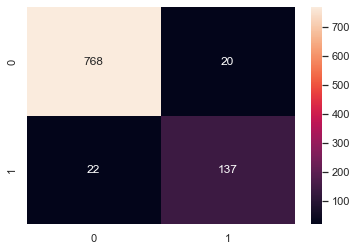

In [121]:
report_default = classification_report(y_test, y_pred_default)
print('Classification Report Default XGB : \n', report_default)

xgb_def = confusion_matrix(y_test, y_pred_default)
sns.heatmap(xgb_def, annot=True, fmt="g")
plt.show()

Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       788
           1       0.92      0.86      0.89       159

    accuracy                           0.96       947
   macro avg       0.95      0.92      0.93       947
weighted avg       0.96      0.96      0.96       947



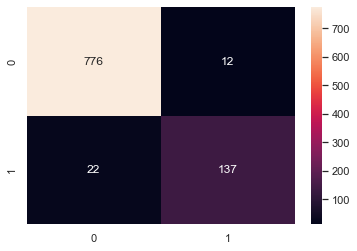

In [122]:
report_tuned = classification_report(y_test, y_pred_xgb_tuning)
print('Classification Report Tuned XGB : \n', report_tuned)

xgb_tun = confusion_matrix(y_test, y_pred_xgb_tuning)
sns.heatmap(xgb_tun, annot=True, fmt="g")
plt.show()

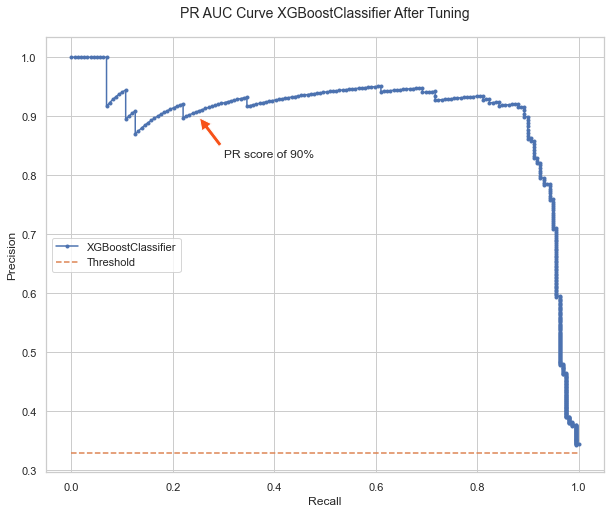

In [123]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba_tuned[:,1])

plt.figure(figsize=(10,8))
plt.plot(recall, precision, marker='.')
plt.title('PR AUC Curve XGBoostClassifier After Tuning', pad = 20, size = 14)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot([0, 1], [threshold_tuned.mean(), threshold_tuned.mean()], linestyle='--', label='Baseline')
plt.annotate('PR score of 90%', xy=(0.25, 0.90), xytext=(0.3,0.83), arrowprops=dict(facecolor='#F75118', shrink=0.05))
plt.legend(['XGBoostClassifier', 'Threshold'], loc = 'center left')
plt.show()

- PR Curve Tuned bekerja dengan threshold 0.33 atau dapat dikatakan kelas positif dengan probabilitas > 0.33 dan kelas negatif dengan probabilitas < 0,33. Dengan PR curve tuned merupakan threshold terbaik untuk masalah ini.

## **Final Model**

In [124]:
# Define model terhadap estimator terbaik
Final_model = XGBClassifier(subsample= 0.7, reg_alpha= 0.001, n_estimators= 182, min_child_weight = 0.3, max_depth = 10, learning_rate = 0.4, gamma = 0, eta = 0.1, colsample_bytree = 0.5, eval_metric='mlogloss')

# Fitting model
Best_model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', Final_model)
    ])
Best_model.fit(X_train, y_train)

# Prdict test set
y_pred_Best_model = Best_model.predict(X_test)

# Simpan nilai metrics f1_score
f1_score_Best_model =  f1_score(y_test, y_pred_Best_model)
print(f1_score_Best_model)

0.8823529411764707


## **Final Importance**

In [125]:
imp = Best_model['model'].feature_importances_
imp

array([0.0124019 , 0.0499667 , 0.01966303, 0.02725101, 0.01282431,
       0.04615328, 0.03755353, 0.02484916, 0.01436375, 0.04140669,
       0.08357379, 0.03020859, 0.02208543, 0.01169425, 0.02178581,
       0.01711756, 0.02495196, 0.03134083, 0.11311319, 0.0227043 ,
       0.02317524, 0.01201673, 0.0261023 , 0.02983252, 0.04331632,
       0.09169474, 0.0242196 , 0.01652459, 0.01558716, 0.02679899,
       0.02572282], dtype=float32)

In [126]:
feature_importance = pd.DataFrame({'Importance':imp, 'Feature':transformer.get_feature_names()}).sort_values(by='Importance', ascending = False).head(10)
feature_importance

,Importance,Feature
18,0.113113,Tenure
25,0.091695,Complain
10,0.083574,OneHot__x3_Grocery
1,0.049967,OneHot__x0_Mobile Phone
5,0.046153,OneHot__x1_E wallet
24,0.043316,NumberOfAddress
9,0.041407,OneHot__x3_Fashion
6,0.037554,OneHot__x1_UPI
17,0.031341,OneHot__x4_Single
11,0.030209,OneHot__x3_Laptop & Accessory


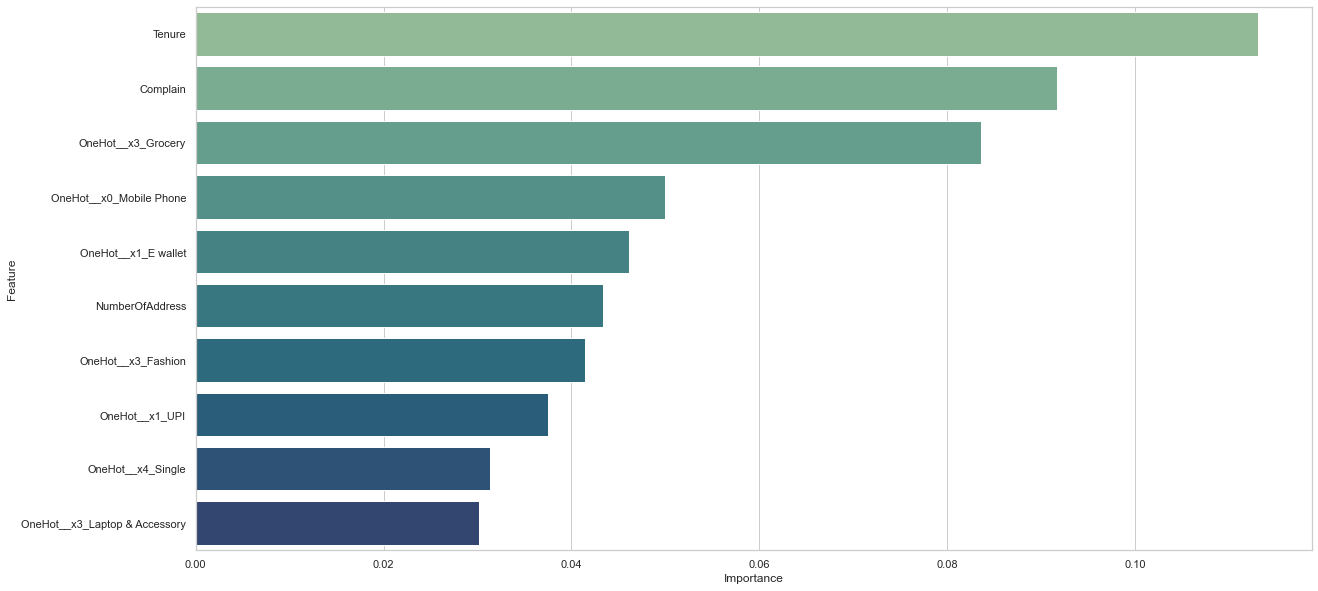

In [127]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(data = feature_importance, x='Importance', y='Feature', orient='h', palette='crest')
plt.show();

Berdasarkan grafik di atas, kita dapat melihat fitur-fitur yang memberikan pengaruh penting (signifikan) terhadap customer churn. Kita dapat menjadikan feature importance sebagai acuan untuk memberikan rekomendasi kepada stakeholder.

Berikut merupakan fitur-fitur yang signifikan berpengaruh terhadap customer churn:
- Tenure
- Complain
- PreferedOrderCat (X3)
- PreferredLoginDevice (X0)
- PreferredPaymentMode (X1)
- NumberOfAddress
- MaritalStatus (X3)

## **Shapley Additive Explanations (SHAP) Values**

- Kita dapat melakukan analisis setiap value per fitur yang memiliki kemungkinan customer churn

In [128]:
import shap

In [129]:
df_shapVal = df.copy()
df_shapVal = df_shapVal.drop(columns=['Churn'])
df_shapVal.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4,Mobile Phone,3,6,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1,1,5.0,159.93
1,8,Mobile Phone,1,8,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0,1,0.0,120.90
2,8,Mobile Phone,1,30,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0,1,3.0,120.28
3,0,Mobile Phone,3,15,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0,1,3.0,134.07
4,0,Mobile Phone,1,12,Credit Card,Male,2.0,3,Mobile,5,Single,3,0,11.0,1,1,3.0,129.60


In [130]:
# Encoding

OneHotEncod = ce.OneHotEncoder(cols=['PreferredLoginDevice',
'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'])

df_shapVal = OneHotEncod.fit_transform(df_shapVal)
df_shapVal.head()

,Tenure,PreferredLoginDevice_1,PreferredLoginDevice_2,CityTier,WarehouseToHome,PreferredPaymentMode_1,PreferredPaymentMode_2,PreferredPaymentMode_3,PreferredPaymentMode_4,PreferredPaymentMode_5,Gender_1,Gender_2,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat_1,PreferedOrderCat_2,PreferedOrderCat_3,PreferedOrderCat_4,PreferedOrderCat_5,PreferedOrderCat_6,SatisfactionScore,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4,1,0,3,6,1,0,0,0,0,1,0,3.0,3,1,0,0,0,0,0,2,1,0,0,9,1,11.0,1,1,5.0,159.93
1,8,1,0,1,8,0,1,0,0,0,0,1,3.0,4,0,1,0,0,0,0,3,1,0,0,7,1,15.0,0,1,0.0,120.90
2,8,1,0,1,30,1,0,0,0,0,0,1,2.0,4,0,1,0,0,0,0,3,1,0,0,6,1,14.0,0,1,3.0,120.28
3,0,1,0,3,15,1,0,0,0,0,0,1,2.0,4,1,0,0,0,0,0,5,1,0,0,8,0,23.0,0,1,3.0,134.07
4,0,1,0,1,12,0,0,1,0,0,0,1,2.0,3,0,1,0,0,0,0,5,1,0,0,3,0,11.0,1,1,3.0,129.60


In [131]:
# Define X and y
X = df_shapVal
y = df['Churn']

In [132]:
model = Final_model.fit(X, y)
explainer = shap.Explainer(model)
# Calculates the SHAP values - It takes some time
shap_val = explainer.shap_values(X)

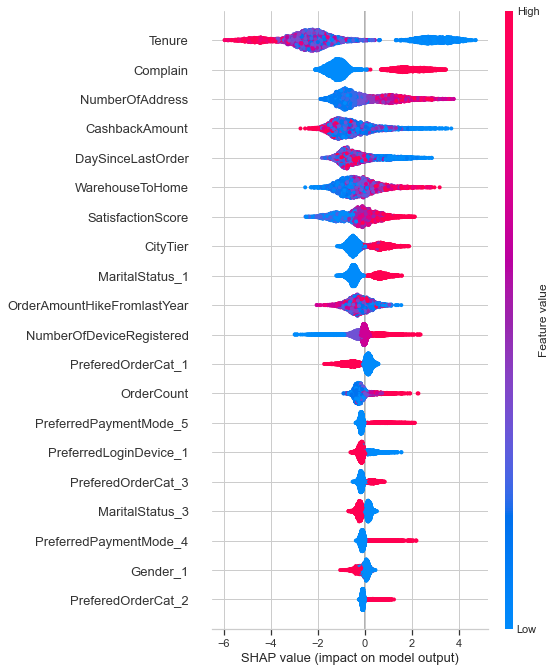

In [133]:
shap.summary_plot(shap_val, df_shapVal)

**Berdasarkan SHAP value:**
1. **Tenure** : Customer dengan Tenure kecil berpengaruh secara positif dengan target atau kemungkinan besar akan churn.
2. **Complain** : Complain hanya memiliki dua value (0 dan 1), `complain == 1` berpengaruh positif dengan target atau customer yang complain kemungkinan besar churn daripada `complain == 0`.
3. **NumberOfAddress** : Jika customer mendaftarkan banyak alamatnya pada e-commerce berpengaruh positif terhadap target (Churn).
4. **CashbackAmount**, **DaySinceLastOrder**, : Memiliki kemungkinan besar akan churn ketika value nya kecil.
5. **WarehouseToHome**, **OrderCount**, **SatisfactionScore** : Memiliki kemungkinan besar akan churn ketika value nya besar.

## **Conclusion & Recommendation****

### Conclusion

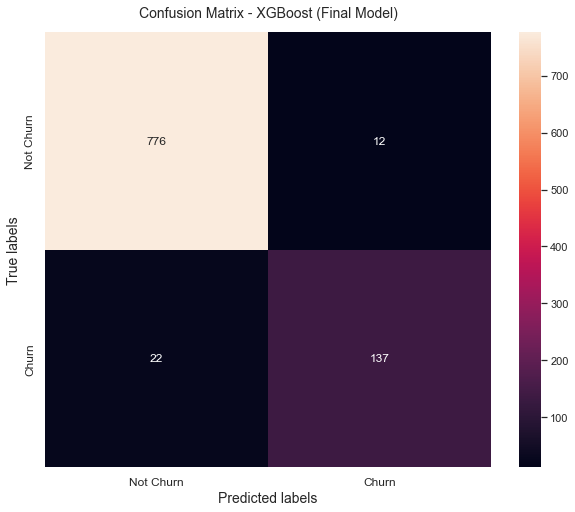

In [134]:
xgb_tun = confusion_matrix(y_test, y_pred_xgb_tuning)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
sns.heatmap(xgb_tun, annot=True, fmt="g", ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', size = 14);
ax.set_ylabel('True labels', size = 14);
ax.set_title('Confusion Matrix - XGBoost (Final Model)', pad = 15, size = 14);
ax.xaxis.set_ticklabels(['Not Churn', 'Churn'], size = 12);
ax.yaxis.set_ticklabels(['Not Churn', 'Churn'], size = 12);
plt.show();

**Informasi:**

Bedasarkan data Revenue E-commerce di Indonesia dari : https://ecommercedb.com/en/markets/id/all
- Pada tahun 2021, salah satu e-commerce dengan revenue sebesar USD 390 million.
- Kita akan menggunakan data tersebut untuk menganalisis performa model yang telah dibangun

Perhitungan Keuangan:
- Revenue tahun 2021 = USD 390 million
- Kita asumsi pendapatan (Revenue) didapatkan dari:
    - 80% dari customer
    - 20% dari others
- Asumsi customer tahun 2021 = 1.000.000 orang
- Revenue per customer = (USD 390 m x 80%) / 1.000.000 (customer) = `USD 312` per customer dalam satu tahun.
- Dana campaign (5% dari revenue) =  USD 19.500.000
- Dana campaign per customer = USD 19.500.000 / 1.000.000 (customer) = `USD 19.5` per customer

Informasi Keuangan:
- Total customer pada dataset tes = 947 orang
- Total Keuntungan per customer = USD 312
- Asumsi dana Campaign/Incentive yang dikeluarkan = `USD 39` million (10% dari Revenue per tahun)

Perhitungan `customer`:
- `False Negative (FN)`
    - Kehilangan customer diprediksi sebanyak 22 orang.
    - Asumsi kita telah kehilangan dana karena customer churn.
    - Potential loss karena kehilangan customer (-) = USD 312 x 22 orang = USD 6864 (-)

- `True Positive (TP)`
    - Total Customer yang benar diprediksi akan churn sebanyak 137 orang
    - Potential saving (+) = USD 312 x 137 orang = USD 42.744 (+)

- Kesimpulan:
    - Saving 'customer income' = USD 42.744 - USD 6864 = USD 35.880 (+)

Perhitungan `Marketing cost`:
- `False Positive (FP)`
    - Potential loss karena salah kasih promo (-) = USD 19.5 x 12 orang (FP) = USD 234(-)

- `True Negative (TN)`
    - Asumsi kita akan memberikan campaign kepada customer tetap
    - Marketing cost = USD 19.5 x 776 orang = USD 15.132 (-)

Kesimpulan:
    - Total Marketing cost = USD 15.132 + USD 234 = USD 15.366 (-)

Kesimpulan seluruhnya:
    - Saving money after campaign = USD 35.880 - USD 15.366 = USD 20.514 (+)

**Summary:**

| No.| Perhitungan | Dana |
| --- | --- | --- |
| 1. | Potential loss karena kehilangan customer (FN) | USD 6864 (-) |
| 2. | Potential saving (TP) | USD 42.744 (+) |
| 3. | Potential loss karena salah kasih promo (FP) |USD 234 (-) |
| 4. | Marketing cost (FP) | USD 15.132 (-) |
| 5. | Total Marketing cost | USD 15.366 (-) |
| 6. | Saving money after campaign | USD 20.514 (+) |

- Percentage saving = (USD 42.744 / USD 49.608) x 100 = 86%
- Total customer churn = USD 312 x 159 = USD 49.608 (-)
- Percentage loss =  USD 6864 (-) x 100 = 13,8%
- Percentage loss karena salah memberikan promo = (USD 234 (-) / USD 15.366) x 100 = 1,5%

1. Berdasarkan campaign cost, kita mengalami kerugian karena memberikan promo yang salah sebesar 1,5%.
2. Berdasarkan perhitungan yang telah dilakukan, kita dapat melakukan saving keuangan hingga 86% dengan loss 13,8%. ini menandakan modeling dapat saving money bagi perusahaan akibat kehilangan customer karena memperkecil prediksi yang salah.
3. Keuntungan yang didapatkan setelah dikurangi dana untuk campaign kepada customer tetap adalah USD 226.746


Classification Report Tuned XGB : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       788
           1       0.92      0.86      0.89       159

    accuracy                           0.96       947
   macro avg       0.95      0.92      0.93       947
weighted avg       0.96      0.96      0.96       947



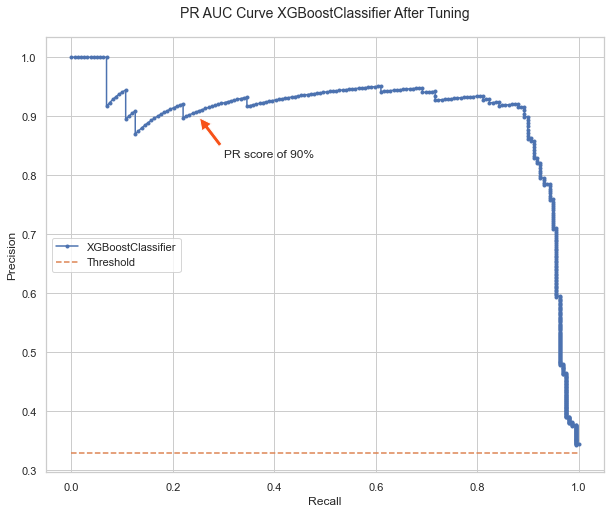

In [135]:
report_tuned = classification_report(y_test, y_pred_xgb_tuning)
print('Classification Report Tuned XGB : \n', report_tuned)

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba_tuned[:,1])

plt.figure(figsize=(10,8))
plt.plot(recall, precision, marker='.')
plt.title('PR AUC Curve XGBoostClassifier After Tuning', pad = 20, size = 14)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot([0, 1], [threshold_tuned.mean(), threshold_tuned.mean()], linestyle='--', label='Baseline')
plt.annotate('PR score of 90%', xy=(0.25, 0.90), xytext=(0.3,0.83), arrowprops=dict(facecolor='#F75118', shrink=0.05))
plt.legend(['XGBoostClassifier', 'Threshold'], loc = 'center left')
plt.show()

**Berdasarkan classification Report:**
- Final model yang digunakan adalah model XGBoost yang telah dilakukan optimize threshold.
- Berdasarkan `f1_score`, terdapat 89% pelanggan perlu diberikan perhatian lebih besar dengan memberikan layanan yang positif karena customer akan churn, dan terdapat 98% customer yang tidak perlu diberikan lebih layanan yang positif karena customer tidak akan churn.

**Informasi kurva:**
1. Kurva PR untuk final model sudah menjelaskan bahwa metrics dapat membedakan antara kelas positif dan kelas negatif atau dapat dikatakan sudah mengklasifikasikan dengan baik karena nilai yang dihasilkan 90% presisi tinggi dengan kurva condong ke sudut kanan atas.

**Konklusi secara general:**
- Berdasarkan dataset yang ada, terdapat 83% customer tidak churn dan 17% customer churn.
- Dari EDA category features kita dapat mengetahui bahwa tingkat Customer yang Churnnya tinggi yaitu 
Customer yang lebih banyak menggunakan Computer, metode pembayarannya menggunakan Cash on Delivery, banyak memesan kategori elektronik, gendernya male dan statusnya single.

### Recommendation

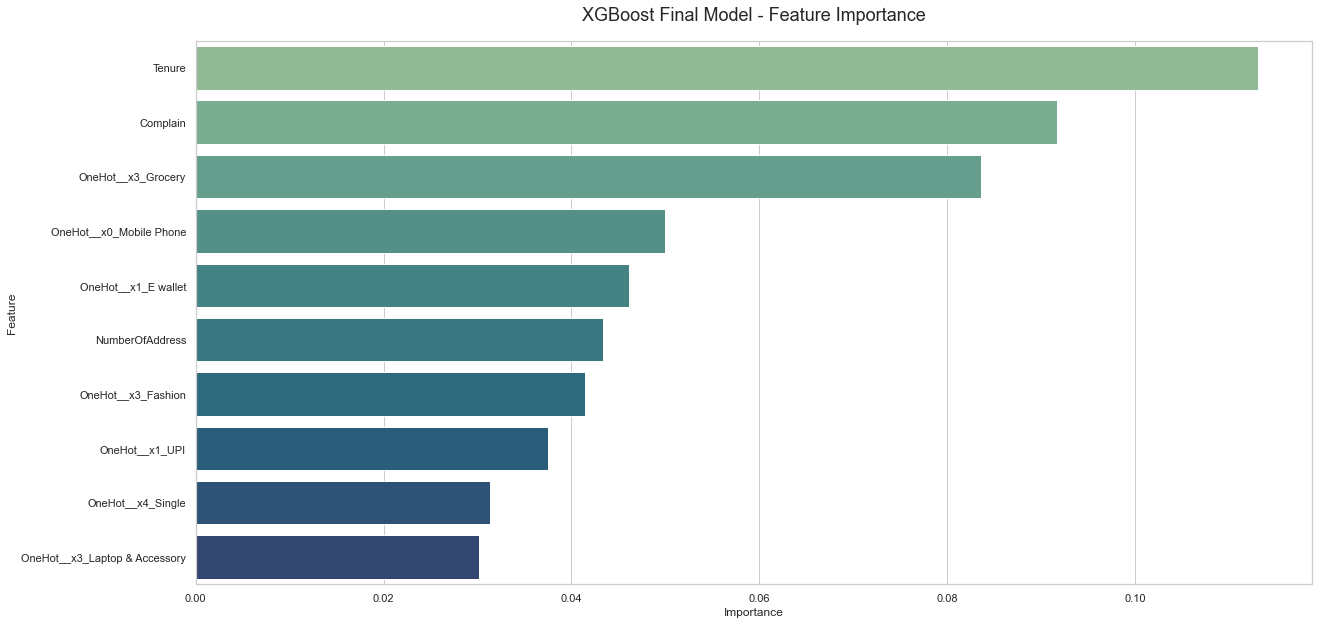

In [136]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(data = feature_importance, x='Importance', y='Feature', orient='h', palette='crest')
plt.title('XGBoost Final Model - Feature Importance', pad = 20, size = 18)
plt.show();

**Berdasarkan Feature Importance yang didapatkan dari Final Model:**
-  `Tenure` merupakan fitur paling penting dalam menentukan customer akan churn. Jika dilihat dari EDA, customer yang memiliki nilai Tenure kecil (0-5 bulan pemakaian) paling banyak dan tingkat churn juga paling besar. Maka kita dapat melakukan:
    - Memberikan layanan yang positif secara besar kepada customer baru (0-5 bulan) agar tetap bertahan menggunakan layanan E-commerce ini.
    - Layanan positif yang diberikan dapat berupa promo gratis ongkir tanpa ada minimal jarak, cashback pembelian barang, dan pemotongan harga yang dibeli.
    - Tentunya kedepannya promo yang diberikan dapat disesuaikan agar tetap meminimalkan pengeluaran secara efisien.
- `Complain` merupakan bagian penting lain yang harus diperhatikan, karena customer yang memberikan complain (1) terhadap e-commerce tingkat churnnya tinggi. Customer yang complain tidak puas dengan layanan yang diberikan ataupun ada masalah yang terjadi ketika customer menggunakan layanan.
    - Hal yang dapat dilakukan untuk kedepannya, dapat mengumpulkan hasil complain tahun lalu terhadap layanan e-commerce, setelah itu menyusun memperbaiki layanan dengan mempertimbangkan complain yang diberikan oleh customer.
- `PreferedOrderCat` kategori grocery merupakan salah satu kategori order yang berpengaruh signifikan, maka kita dapat memaksimalkan layanan terhadap customer yang melakukan pembelian pada kategori grocery.


**Berdasarkan EDA:**
1. Customer yang menggunakan computer lebih sedikit dan tingkat churnnya tinggi, oleh karena itu kita perlu menurunkan churn rate dengan meningkatkan layanan pada customer login menggunakan computer.
2. Penggunaan layanan pembayaran berupa Cash on Delivery memiliki tingkat churn yang tinggi. Sebelum kita memperbaiki layanan, kita dapat meminta feedback kekurangan terhadap layanan dari Customer yang menggunakan agar kita dapat memperbaiki layanan dan menurunkan churn rate Customer.
3. Customer yang membeli kategori elektronik pada layanan e commerce paling tinggi churnnya (63%). Oleh karena itu, kita dapat meningkatkan keamanan transaksi, pengiriman dan proteksi produk (dapat berupa asuransi rusak dan kecurian). Dapat juga diberikan promo pemotongan harga dan ongkir yang tidak tinggi agar customer nyaman berbelanja elektronik.
4. Customer Single memiliki churn tinggi. Jika ingin menurunkan Churn ratenya, kita bisa meningkatkan terhadap layanan feature lain. Karena Customer Single termasuk dalam kategori dengan churn rate tinggi pada feature lain.
5. Perlu diperhatikan terhadap `satisfaction score` yang diberikan customer. Satisfaction score sama dengan 3 merupakan penilaian paling banyak diberikan oleh customer diikuti score sama dengan 1. Ini menandakan bahwa customer tidak puas terhadap layanan yang diberikan. Sedangkan, tingkat churn customer tinggi dengan score 5. Terdapat dua hal yang perlu diperhatikan dan diberikan rekomendasi.
    - Untuk customer yang memberikan score buruk (< 3) namun, tingkat churn rendah. Kita dapat meningkatkan layanan yang positif seperti, memberikan kupon promo, atau meningkatkan keamanan dalam bertransaksi dan pengiriman barang, dan cepat respon ketika customer memberikan complain.
    - Untuk customer yang memberikan score paling baik (5), secara logika customer yang memberikan nilai paling baik, tingkat churn-nya seharusnya kecil. Berdasarkan hasil EDA dan observasi terhadap fitur lain, ternyata customer tersebut merupakan golongan customer baru (0-5 bulan) yang hanya melakukan order paling banyak 1 hingga 2 kali dan menggunakan kupon sedikit. Sehingga, dapat memberikan treatment positif kedepannya untuk customer yang memberikan score paling baik (5) agar tetap menjadi customer yang loyal seperti memberikan promo apapun.
6. Berdasarkan `CouponUsed` yang didapatkan dan digunakan oleh customer, customer yang menggunakan kupon sebanyak 8 kali memiliki tingkat churn tinggi, namun jumlah customernya paling sedikit. Oleh karena itu, kita dapat mengasumsikan bahwa customer tersebut merupakan 'Coupon seeker' atau orang-orang yang hanya menggunakan layanan karena ada promo, setelah promo digunakan mereka akan berhenti menggunakan layanan dan berpindah ke kompetitor. Maka, kita dapat merekomendasikan untuk selalu intens memberikan informasi promo kepada customer tersebut.

**Hal-hal yang dapat dilakukan untuk memaksimalkan model:**
1. Mencoba model algoritma klasifikasi lain yang lebih tinggi tingkat akurasinya atau lebih cocok terhadap costumer churn
2. Melakukan banyak percobaan terhadap hyperparameter tuning agar mendapatkan parameter yang paling baik.
3. Mencoba metode handling imbalance lainnya yang dapat mengatasi imbalance klasifikasi.
4. Mengeksplorasi lebih banyak hubungan antar feature dan target agar model yang dibangun semakin akurat.

**Limitasi Model**
- Jumlah data setelah drop outlier = 4735 baris
- Warehouse to Home: 5 - 36 km
- Hour Spend on App: 0.5 - 4.5 jam
- Number of Address: 1 - 12 alamat
- Cashback amount : 81 - 324.73